# Dependency, Preprocessing, and EDA

In [ ]:
import torch
!pip install -q torch-scatter~=2.1.0 torch-sparse~=0.6.16 torch-cluster~=1.6.0 torch-spline-conv~=1.2.1 torch-geometric==2.2.0 -f https://data.pyg.org/whl/torch-{torch.__version__}.html
!sudo apt-get install -y fonts-nanum

torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/DATA304'

/content/drive/MyDrive


In [ ]:
import pandas as pd

df = pd.read_csv('daangn.csv', encoding='utf-8-sig')
df = df.sample(n=20000, random_state=42)

df

,Temperature,Title,Category,Time Posted,Price,Description,Interest Count,Chat Count,View Count
75721,36.8,LG 디오스 광파오븐렌인지(ma323bws) /전자레인지 팝니다,생활가전,끌올 4일 전,"40,000원",13년도 구입해서 거의 전자렌지용으로 사용해왔습니다. 다양한 기능 있는데 요리좋아하...,11.0,0,350.0
80184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76699,37.9,아동용 외투 잠바 점퍼,유아동,8일 전,"9,000원",내피 탈부착 가능 요즘에 입기 좋습니다\n사이즈 165입니다\n초등고학년이 정도 추...,1.0,0,27.0
92991,38.2,빨래건조대,생활/주방,3일 전,"6,900원",소형 빨래건조대입니다\n작아서 방이나 거실에서 빨래말리면\n가습기 역할도좋습니다\n...,1.0,0,72.0
...,...,...,...,...,...,...,...,...,...
32595,59.8,아디다스 집업 팝니다.,여성의류,20일 전,"5,000원",아디다스 정품 집업 팝니다.\n사이즈 (55정도)\n후드 줄이 없고 미세한 이염있는...,1.0,2,200.0
29313,38.5,발렌티노 에스파듀 41 사이즈(260~265) 새상품,남성패션/잡화,끌올 3일 전,"140,000원",발렌티노 에스파듀 41 사이즈(260~265) 입니다. \n상태는 박스채 새상품이고...,6.0,0,143.0
37862,38.1,히트2 쿠폰,취미/게임/음반,19일 전,"1,000원",환불불가\n코드거래,0.0,0,8.0
53421,40.7,에뜨와 우주복,유아동,14일 전,"30,000원",갓난아기 옷이 다 그렇듯 선물로 받아 \n서너번 입혔습니다.\n신품가격 생각하면 당...,0.0,1,64.0


In [ ]:
df = df.dropna()
df

,Temperature,Title,Category,Time Posted,Price,Description,Interest Count,Chat Count,View Count
75721,36.8,LG 디오스 광파오븐렌인지(ma323bws) /전자레인지 팝니다,생활가전,끌올 4일 전,"40,000원",13년도 구입해서 거의 전자렌지용으로 사용해왔습니다. 다양한 기능 있는데 요리좋아하...,11.0,0,350.0
76699,37.9,아동용 외투 잠바 점퍼,유아동,8일 전,"9,000원",내피 탈부착 가능 요즘에 입기 좋습니다\n사이즈 165입니다\n초등고학년이 정도 추...,1.0,0,27.0
92991,38.2,빨래건조대,생활/주방,3일 전,"6,900원",소형 빨래건조대입니다\n작아서 방이나 거실에서 빨래말리면\n가습기 역할도좋습니다\n...,1.0,0,72.0
80917,37.1,전동킥보드 기함급 타우러스X 네고가능,스포츠/레저,끌올 3일 전,175만원,타우러스X 700키로대 좌우꿍 없습니다 상태 좋고요 직거래 지역은 천안입니다 윗지역...,7.0,1,284.0
60767,37.6,차요테 판매해요,식물,끌올 7일 전,"4,000원",꽃모양으로 썰어서 장아찌를 만들면 요리사 된 느낌 ^^\n5 kg부터 판매합니다,3.0,0,200.0
...,...,...,...,...,...,...,...,...,...
32595,59.8,아디다스 집업 팝니다.,여성의류,20일 전,"5,000원",아디다스 정품 집업 팝니다.\n사이즈 (55정도)\n후드 줄이 없고 미세한 이염있는...,1.0,2,200.0
29313,38.5,발렌티노 에스파듀 41 사이즈(260~265) 새상품,남성패션/잡화,끌올 3일 전,"140,000원",발렌티노 에스파듀 41 사이즈(260~265) 입니다. \n상태는 박스채 새상품이고...,6.0,0,143.0
37862,38.1,히트2 쿠폰,취미/게임/음반,19일 전,"1,000원",환불불가\n코드거래,0.0,0,8.0
53421,40.7,에뜨와 우주복,유아동,14일 전,"30,000원",갓난아기 옷이 다 그렇듯 선물로 받아 \n서너번 입혔습니다.\n신품가격 생각하면 당...,0.0,1,64.0


In [ ]:
df['Category'].unique()

array(['생활가전', '유아동', '생활/주방', '스포츠/레저', '식물', '반려동물용품', '티켓/교환권',
       '남성패션/잡화', '디지털기기', '기타 중고물품', '여성의류', '취미/게임/음반', '도서', '가구/인테리어',
       '여성잡화', '뷰티/미용', '가공식품', '유아도서', '삽니다'], dtype=object)

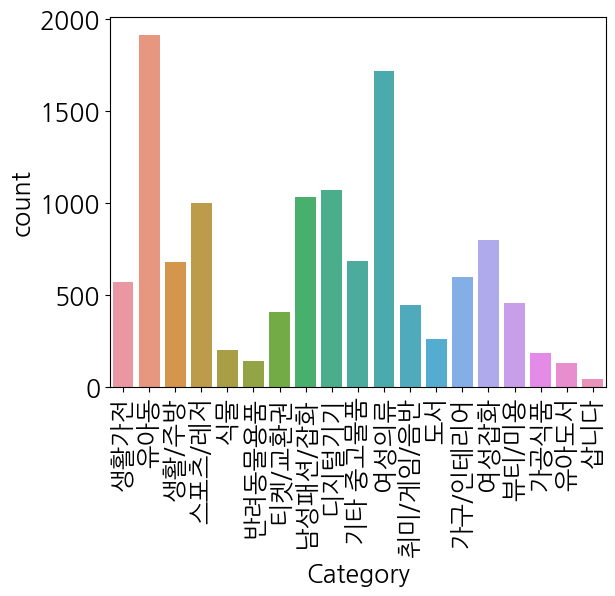

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
from matplotlib import font_manager, rc

warnings.filterwarnings('ignore')

fe = font_manager.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    name='NanumGothic')
font_manager.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

mpl.rcParams['axes.unicode_minus'] = False

plt.xticks(rotation=90)
sns.countplot(x=df['Category']);

In [ ]:
df = df[df['Category'] != '삽니다']

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

import torch
import torch.nn.functional as F
from torch import nn, optim, Tensor

from torch_geometric.utils import structured_negative_sampling
from torch_geometric.nn.conv.gcn_conv import gcn_norm
from torch_geometric.nn import LGConv

유저 ID의 고유 번호에 대한 주소 접근을 통해 크롤링을 하는 것이 불가능 했음

$\to$ 유저 기반 추천 시스템이 아니라 카테고리 기반 추천 시스템으로 목적성 변경

$\to$ Task를 Recommendation system과 유사하다고 볼 수 있는 Link prediction으로 변경

우리의 목적은 유저들의 편의성을 높일 만한 모델을 구현하는 것이었기 때문에 실제 서비스를 하는 입장이라면 이와 같은 원리로 추천 시스템을 구현해 낼 수 있을 것으로 생각

아래는 GPT-4가 판단한 10점 만점의 관련성 점수 중 7점 이상의 카테고리를 나열한 것이다.

| 카테고리1        | 카테고리2        | 관련성 점수 |
|----------------|----------------|------------|
| 유아동          | 유아도서        | 9          |
| 유아동          | 여성의류        | 7          |
| 스포츠/레저      | 티켓/교환권      | 8          |
| 스포츠/레저      | 여성의류        | 7          |
| 남성패션/잡화     | 여성잡화        | 8          |
| 생활가전        | 디지털기기      | 8          |
| 생활가전        | 가구/인테리어    | 7          |
| 디지털기기      | 기타 중고물품    | 7          |
| 뷰티/미용        | 여성의류        | 8          |
| 뷰티/미용        | 여성잡화        | 7          |
| 가구/인테리어    | 여성의류        | 8          |
| 여성의류        | 여성잡화        | 9          |
| 취미/게임/음반   | 티켓/교환권      | 8          |
| 취미/게임/음반   | 디지털기기      | 7          |
| 생활/주방        | 가구/인테리어    | 8          |
| 식물            | 가구/인테리어    | 7          |
| 반려동물용품     | 기타 중고물품    | 8          |

In [ ]:
df['up'] = df['Time Posted'].apply(lambda x: 1 if x.startswith('끌올') else 0)

def get_time_in_days(s):
    number = int(''.join(filter(str.isdigit, s)))
    if '일' in s:
        return number
    elif '시간' in s:
        return number / 24.0
    else:
        return 0

df['time'] = df['Time Posted'].apply(get_time_in_days)

df = df.drop(columns=['Description', 'Time Posted'])
df

,Temperature,Title,Category,Price,Interest Count,Chat Count,View Count,up,time
75721,36.8,LG 디오스 광파오븐렌인지(ma323bws) /전자레인지 팝니다,생활가전,"40,000원",11.0,0,350.0,1,4.0
76699,37.9,아동용 외투 잠바 점퍼,유아동,"9,000원",1.0,0,27.0,0,8.0
92991,38.2,빨래건조대,생활/주방,"6,900원",1.0,0,72.0,0,3.0
80917,37.1,전동킥보드 기함급 타우러스X 네고가능,스포츠/레저,175만원,7.0,1,284.0,1,3.0
60767,37.6,차요테 판매해요,식물,"4,000원",3.0,0,200.0,1,7.0
...,...,...,...,...,...,...,...,...,...
32595,59.8,아디다스 집업 팝니다.,여성의류,"5,000원",1.0,2,200.0,0,20.0
29313,38.5,발렌티노 에스파듀 41 사이즈(260~265) 새상품,남성패션/잡화,"140,000원",6.0,0,143.0,1,3.0
37862,38.1,히트2 쿠폰,취미/게임/음반,"1,000원",0.0,0,8.0,0,19.0
53421,40.7,에뜨와 우주복,유아동,"30,000원",0.0,1,64.0,0,14.0


In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

def load_glove_model(glove_file_path):
    glove_model = {}
    with open(glove_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:], dtype=np.float64)
            glove_model[word] = embedding
    return glove_model


def get_average_glove(tokens_list, glove_model, vector_size):
    if not tokens_list:
        return np.zeros(vector_size)
    word_vectors = [glove_model[word] for word in tokens_list if word in glove_model]

    if not word_vectors:
        return np.zeros(vector_size)
    else:
        return np.mean(word_vectors, axis=0)

glove_file_path = 'glove.6B.100d.txt'
glove_model = load_glove_model(glove_file_path)

df['Tokenized'] = df['Title'].apply(word_tokenize)
df['Glove_Embedding'] = df['Tokenized'].apply(lambda tokens: get_average_glove(tokens, glove_model, vector_size=100))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df['Price'] = df['Price'].str.replace(',', '').str.extract('(\d+)')
df['Price'] = df['Price'].fillna(0).astype(int)

df['Chat Count'] = df['Chat Count'].fillna(0).astype(int)

df

,Temperature,Title,Category,Price,Interest Count,Chat Count,View Count,up,time,Tokenized,Glove_Embedding
75721,36.8,LG 디오스 광파오븐렌인지(ma323bws) /전자레인지 팝니다,생활가전,40000,11.0,0,350.0,1,4.0,"[LG, 디오스, 광파오븐렌인지, (, ma323bws, ), /전자레인지, 팝니다]","[0.027249999999999996, 0.31850500000000004, 0...."
76699,37.9,아동용 외투 잠바 점퍼,유아동,9000,1.0,0,27.0,0,8.0,"[아동용, 외투, 잠바, 점퍼]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
92991,38.2,빨래건조대,생활/주방,6900,1.0,0,72.0,0,3.0,[빨래건조대],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
80917,37.1,전동킥보드 기함급 타우러스X 네고가능,스포츠/레저,175,7.0,1,284.0,1,3.0,"[전동킥보드, 기함급, 타우러스X, 네고가능]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
60767,37.6,차요테 판매해요,식물,4000,3.0,0,200.0,1,7.0,"[차요테, 판매해요]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...
32595,59.8,아디다스 집업 팝니다.,여성의류,5000,1.0,2,200.0,0,20.0,"[아디다스, 집업, 팝니다, .]","[-0.33979, 0.20941, 0.46348, -0.64792, -0.3837..."
29313,38.5,발렌티노 에스파듀 41 사이즈(260~265) 새상품,남성패션/잡화,140000,6.0,0,143.0,1,3.0,"[발렌티노, 에스파듀, 41, 사이즈, (, 260~265, ), 새상품]","[0.05678666666666666, 0.3518333333333333, 0.46..."
37862,38.1,히트2 쿠폰,취미/게임/음반,1000,0.0,0,8.0,0,19.0,"[히트2, 쿠폰]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
53421,40.7,에뜨와 우주복,유아동,30000,0.0,1,64.0,0,14.0,"[에뜨와, 우주복]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
import networkx as nx
from tqdm import tqdm

relations = {
    '유아동': [('유아도서', 9), ('여성의류', 7)],
    '스포츠/레저': [('티켓/교환권', 8), ('여성의류', 7)],
    '남성패션/잡화': [('여성잡화', 8)],
    '생활가전': [('디지털기기', 8), ('가구/인테리어', 7)],
    '디지털기기': [('기타 중고물품', 7)],
    '뷰티/미용': [('여성의류', 8), ('여성잡화', 7)],
    '가구/인테리어': [('여성의류', 8)],
    '여성의류': [('여성잡화', 9)],
    '여성잡화': [],
    '기타 중고물품': [('반려동물용품', 8)],
    '유아도서': [],
    '티켓/교환권': [],
    '취미/게임/음반': [('티켓/교환권', 8), ('디지털기기', 7)],
    '생활/주방': [('가구/인테리어', 8)],
    '식물': [],
    '도서': [],
    '반려동물용품': [('기타 중고물품', 8)],
    '가공식품': []
}

In [ ]:
G = nx.Graph()

for idx, row in df.iterrows():
    features = {
        'Temperature': row['Temperature'],
        'Price': row['Price'],
        'Interest_Count': row['Interest Count'],
        'Chat_Count': row['Chat Count'],
        'View_Count': row['View Count'],
        'up': row['up'],
        'time': row['time'],
        'Glove_Embedding': row['Glove_Embedding']
    }
    G.add_node(idx, **features)


for category, related_categories in tqdm(relations.items(), desc='For loop 1'):
    for related_category, score in tqdm(related_categories, desc='For loop 2'):
        source_indices = df[df['Category'] == category].index
        target_indices = df[df['Category'] == related_category].index
        for source_idx in source_indices:
            for target_idx in target_indices:
                G.add_edge(source_idx, target_idx)

For loop 1:  44%|████▍     | 8/18 [00:17<00:17,  1.80s/it]
For loop 2: 0it [00:00, ?it/s]

For loop 1:  56%|█████▌    | 10/18 [00:17<00:07,  1.03it/s]
For loop 2: 0it [00:00, ?it/s]

For loop 2: 0it [00:00, ?it/s]

For loop 1:  78%|███████▊  | 14/18 [00:18<00:02,  1.54it/s]
For loop 2: 0it [00:00, ?it/s]

For loop 2: 0it [00:00, ?it/s]

For loop 1:  94%|█████████▍| 17/18 [00:19<00:00,  2.62it/s]
For loop 2: 0it [00:00, ?it/s]
For loop 1: 100%|██████████| 18/18 [00:19<00:00,  1.06s/it]


In [ ]:
import random

all_nodes = list(G.nodes())
subset_nodes = random.sample(all_nodes, 1000)
subgraph = nx.Graph()

for category, related_categories in tqdm(relations.items(), desc='For loop 1'):
    for related_category, score in tqdm(related_categories, desc='For loop 2'):
        source_indices = df[df['Category'] == category].index
        target_indices = df[df['Category'] == related_category].index
        for source_idx in source_indices:
            for target_idx in target_indices:
                subgraph.add_edge(source_idx, target_idx)

For loop 1:  44%|████▍     | 8/18 [00:19<00:20,  2.04s/it]
For loop 2: 0it [00:00, ?it/s]

For loop 1:  56%|█████▌    | 10/18 [00:19<00:08,  1.11s/it]
For loop 2: 0it [00:00, ?it/s]

For loop 2: 0it [00:00, ?it/s]

For loop 1:  78%|███████▊  | 14/18 [00:21<00:02,  1.38it/s]
For loop 2: 0it [00:00, ?it/s]

For loop 2: 0it [00:00, ?it/s]

For loop 1:  94%|█████████▍| 17/18 [00:21<00:00,  2.37it/s]
For loop 2: 0it [00:00, ?it/s]
For loop 1: 100%|██████████| 18/18 [00:21<00:00,  1.18s/it]


In [ ]:
import networkx as nx
import numpy as np
from tqdm import tqdm

def fruchterman_reingold(G, dim=2, k=None, pos=None, fixed=None, iterations=10, threshold=1e-4,
                         weight='weight', scale=1.0, center=None, seed=None):
    import numpy as np

    if pos is None:
        pos = np.random.rand(len(G), dim)
        if center is not None:
            pos *= scale
            pos += center
    else:
        pos = pos.astype(np.float64)

    if fixed is not None:
        fixed = np.asarray(fixed, dtype=np.int32)

    A = nx.to_numpy_array(G, weight=weight)
    if k is None:
        k = np.sqrt(1.0 / len(G))
    t = 0.1
    dt = t / float(iterations+1)

    dis = np.zeros((len(G), len(G), dim))
    for iteration in tqdm(range(iterations), desc='Layout progress'):
        delta = pos[:, np.newaxis, :] - pos[np.newaxis, :, :]
        distance = np.linalg.norm(delta, axis=-1)
        np.fill_diagonal(distance, 1)

        distance = np.where(distance < threshold, 1, distance)
        direction = np.einsum('ijk,ij->ijk', delta, k * k / distance**2 - A * distance / k)
        displacement = np.sum(direction, axis=1)
        length = np.linalg.norm(displacement, axis=-1)
        length = np.where(length < threshold, 0.1, length)
        delta_pos = np.einsum('ij,i->ij', displacement, t / length)
        if fixed is not None:
            delta_pos[fixed] = 0.0
        pos += delta_pos
        t -= dt
        if t < 0:
            break
    return pos

pos = fruchterman_reingold(subgraph)

Layout progress: 100%|██████████| 10/10 [02:07<00:00, 12.70s/it]


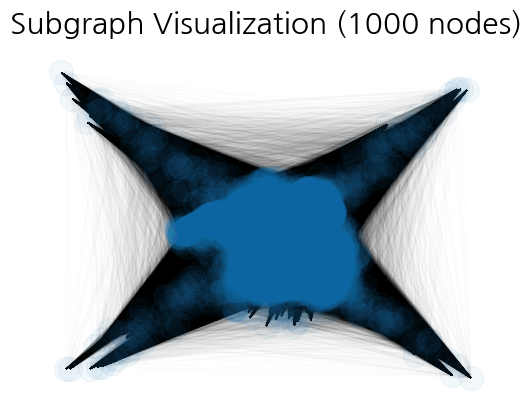

In [ ]:
pos_dict = {node: pos[i] for i, node in enumerate(subgraph.nodes)}

nx.draw_networkx_nodes(subgraph, pos_dict, alpha=0.05)
nx.draw_networkx_edges(subgraph, pos_dict, alpha=0.01, width=1)

plt.title("Subgraph Visualization (1000 nodes)")
plt.axis('off')
plt.show()

# Modeling and Learning

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from torch_geometric.utils import negative_sampling
from sklearn.metrics import roc_auc_score
from torch_geometric.utils import from_networkx

data = from_networkx(G)
edges = torch.tensor(list(G.edges)).t().contiguous()

In [ ]:
def positive_sampling(edge_index, num_pos_samples):
    indices = torch.randperm(edge_index.size(1))[:num_pos_samples]
    return edge_index[:, indices]

In [ ]:
class GCN(torch.nn.Module):
    def __init__(self, num_features, num_hidden, num_classes, dropout_rate=0.5):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, num_hidden)
        self.conv2 = GCNConv(num_hidden, num_classes)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.conv2(x, edge_index)
        return x

In [ ]:
from sklearn.preprocessing import StandardScaler

features = [torch.tensor(data.Temperature), torch.tensor(data.Price), torch.tensor(data.Interest_Count),
            torch.tensor(data.Chat_Count), torch.tensor(data.View_Count), torch.tensor(data.up), torch.tensor(data.time), torch.tensor(data.Glove_Embedding)]
features = [f.view(data.Temperature.shape[0], -1) for f in features]
x = torch.cat(features, dim=1)

data.x = x

node_features = data.x

scaler = StandardScaler()
node_features_normalized = scaler.fit_transform(node_features)

data.x = torch.tensor(node_features_normalized, dtype=torch.float)

print(data)

Data(edge_index=[2, 25699844], Temperature=[12270], Price=[12270], Interest_Count=[12270], Chat_Count=[12270], View_Count=[12270], up=[12270], time=[12270], Glove_Embedding=[12270, 100], num_nodes=12270, x=[12270, 107])


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score

model = GCN(num_features=data.num_features, num_hidden=64, num_classes=1, dropout_rate=0.1)
# model = GATv2(num_features=data.num_features, num_hidden=32, num_classes=1, dropout_rate=0.1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
criterion = torch.nn.BCEWithLogitsLoss()
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)

def get_link_labels(pos_edge_index, neg_edge_index):
    E = pos_edge_index.size(1) + neg_edge_index.size(1)
    link_labels = torch.zeros(E, dtype=torch.float)
    link_labels[:pos_edge_index.size(1)] = 1.
    return link_labels

def train(data, model, optimizer, epochs=500, patience=30):
    all_losses = []
    all_accuracies = []
    all_f1_scores = []
    all_auc_scores = []

    best_loss = float('inf')
    patience_counter = 0
    model.train()

    for epoch in range(epochs):
        optimizer.zero_grad()

        pos_edge_index = positive_sampling(data.edge_index, num_pos_samples=6135)
        neg_edge_index = negative_sampling(pos_edge_index, num_neg_samples=6135)

        edge_index = torch.cat([pos_edge_index, neg_edge_index], dim=-1)
        edge_label = get_link_labels(pos_edge_index=pos_edge_index, neg_edge_index=neg_edge_index)

        edge_out = model(data.x.float(), edge_index)
        edge_out = edge_out.view(-1)
        loss = criterion(edge_out, edge_label.float())

        loss.backward()
        optimizer.step()
        scheduler.step()

        pred_prob = torch.sigmoid(edge_out)
        pred = (pred_prob > 0.5).int()
        acc = (pred == edge_label.int()).sum().float() / len(edge_label)

        f1 = f1_score(edge_label.int().cpu().detach().numpy(), pred.cpu().detach().numpy())
        auc = roc_auc_score(edge_label.int().cpu().detach().numpy(), pred_prob.cpu().detach().numpy())

        all_losses.append(loss.item())
        all_accuracies.append(acc)
        all_f1_scores.append(f1)
        all_auc_scores.append(auc)

        print(f"Epoch: {epoch + 1}, Loss: {loss:.4f}, Acc: {acc:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

        if loss < best_loss:
            best_loss = loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Stopping early due to lack of improvement in loss.")
                break

    return all_losses, all_accuracies, all_f1_scores, all_auc_scores

all_losses, all_accuracies, all_f1_scores, all_auc_scores = train(data, model, optimizer)

Epoch: 1, Loss: 0.7830, Acc: 0.4943, F1: 0.4460, AUC: 0.4909
Epoch: 2, Loss: 1.1009, Acc: 0.4946, F1: 0.5451, AUC: 0.4960
Epoch: 3, Loss: 0.8587, Acc: 0.4985, F1: 0.5411, AUC: 0.4927
Epoch: 4, Loss: 0.7304, Acc: 0.5015, F1: 0.3252, AUC: 0.5046
Epoch: 5, Loss: 0.8372, Acc: 0.5020, F1: 0.4233, AUC: 0.5014
Epoch: 6, Loss: 0.8369, Acc: 0.5003, F1: 0.4287, AUC: 0.4981
Epoch: 7, Loss: 0.7715, Acc: 0.5057, F1: 0.4527, AUC: 0.5027
Epoch: 8, Loss: 0.7279, Acc: 0.4971, F1: 0.5830, AUC: 0.4900
Epoch: 9, Loss: 0.7304, Acc: 0.5024, F1: 0.5839, AUC: 0.5027
Epoch: 10, Loss: 0.7507, Acc: 0.5059, F1: 0.5690, AUC: 0.5111
Epoch: 11, Loss: 0.7565, Acc: 0.5057, F1: 0.5507, AUC: 0.5057
Epoch: 12, Loss: 0.7432, Acc: 0.4948, F1: 0.5229, AUC: 0.4908
Epoch: 13, Loss: 0.7176, Acc: 0.5012, F1: 0.4266, AUC: 0.5015
Epoch: 14, Loss: 0.7112, Acc: 0.5004, F1: 0.3196, AUC: 0.4999
Epoch: 15, Loss: 0.7144, Acc: 0.5040, F1: 0.3923, AUC: 0.5081
Epoch: 16, Loss: 0.7206, Acc: 0.5086, F1: 0.4281, AUC: 0.5098
Epoch: 17, Loss: 

In [ ]:
model.eval()
with torch.no_grad():
    pos_edge_index = positive_sampling(data.edge_index, num_pos_samples=6135)
    neg_edge_index = negative_sampling(pos_edge_index, data.x.size(0), num_neg_samples=6135)

    edge_index = torch.cat([pos_edge_index, neg_edge_index], dim=-1)
    edge_label = get_link_labels(pos_edge_index=pos_edge_index, neg_edge_index=neg_edge_index)

    edge_out = model(data.x.float(), edge_index)
    edge_out = edge_out.view(-1)
    loss = criterion(edge_out, edge_label.float())

    pred_prob = torch.sigmoid(edge_out)
    pred = (pred_prob > 0.5).int()
    acc = (pred == edge_label.int()).sum().float() / len(edge_label)

    f1 = f1_score(edge_label.int().cpu().detach().numpy(), pred.cpu().detach().numpy())
    auc = roc_auc_score(edge_label.int().cpu().detach().numpy(), pred_prob.cpu().detach().numpy())

    print(f"Loss: {loss:.4f}, Acc: {acc:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

Loss: 0.6905, Acc: 0.5264, F1: 0.5165, AUC: 0.5357


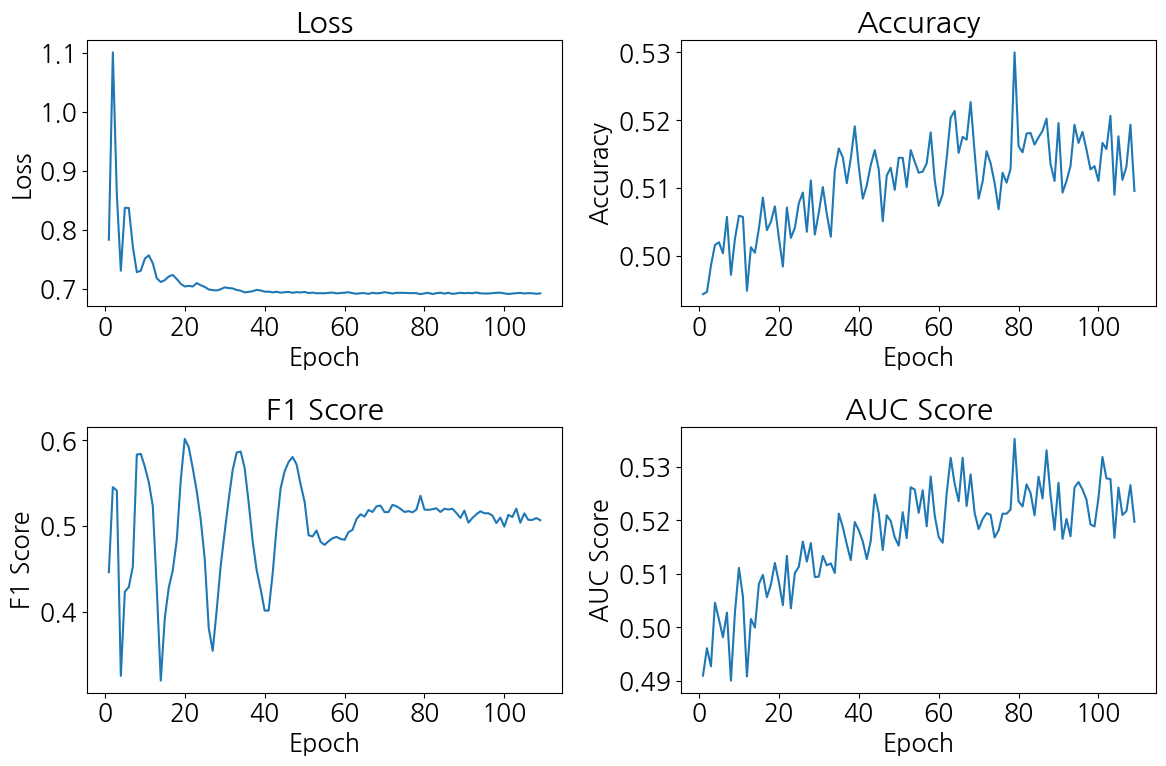

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(range(1, len(all_losses) + 1), all_losses)
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(2, 2, 2)
plt.plot(range(1, len(all_losses) + 1), all_accuracies)
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.subplot(2, 2, 3)
plt.plot(range(1, len(all_losses) + 1), all_f1_scores)
plt.title("F1 Score")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")

plt.subplot(2, 2, 4)
plt.plot(range(1, len(all_losses) + 1), all_auc_scores)
plt.title("AUC Score")
plt.xlabel("Epoch")
plt.ylabel("AUC Score")

plt.tight_layout()
plt.show()

# GAT

In [ ]:
from torch_geometric.nn import GATv2Conv

class GATv2(torch.nn.Module):
    def __init__(self, num_features, num_hidden, num_classes, dropout_rate=0.5, heads=8):
        super(GATv2, self).__init__()
        self.conv1 = GATv2Conv(num_features, num_hidden, heads=heads)
        self.conv2 = GATv2Conv(num_hidden * heads, num_classes, heads=1)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.conv2(x, edge_index)
        return x

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score

# model = GCN(num_features=data.num_features, num_hidden=64, num_classes=1, dropout_rate=0.1)
model = GATv2(num_features=data.num_features, num_hidden=32, num_classes=1, dropout_rate=0.1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
criterion = torch.nn.BCEWithLogitsLoss()
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)

def get_link_labels(pos_edge_index, neg_edge_index):
    E = pos_edge_index.size(1) + neg_edge_index.size(1)
    link_labels = torch.zeros(E, dtype=torch.float)
    link_labels[:pos_edge_index.size(1)] = 1.
    return link_labels

def train(data, model, optimizer, epochs=500, patience=30):
    all_losses = []
    all_accuracies = []
    all_f1_scores = []
    all_auc_scores = []

    best_loss = float('inf')
    patience_counter = 0
    model.train()

    for epoch in range(epochs):
        optimizer.zero_grad()

        pos_edge_index = positive_sampling(data.edge_index, num_pos_samples=6135)
        neg_edge_index = negative_sampling(pos_edge_index, num_neg_samples=6135)

        edge_index = torch.cat([pos_edge_index, neg_edge_index], dim=-1)
        edge_label = get_link_labels(pos_edge_index=pos_edge_index, neg_edge_index=neg_edge_index)

        edge_out = model(data.x.float(), edge_index)
        edge_out = edge_out.view(-1)
        loss = criterion(edge_out, edge_label.float())

        loss.backward()
        optimizer.step()
        scheduler.step()

        pred_prob = torch.sigmoid(edge_out)
        pred = (pred_prob > 0.5).int()
        acc = (pred == edge_label.int()).sum().float() / len(edge_label)

        f1 = f1_score(edge_label.int().cpu().detach().numpy(), pred.cpu().detach().numpy())
        auc = roc_auc_score(edge_label.int().cpu().detach().numpy(), pred_prob.cpu().detach().numpy())

        all_losses.append(loss.item())
        all_accuracies.append(acc)
        all_f1_scores.append(f1)
        all_auc_scores.append(auc)

        print(f"Epoch: {epoch + 1}, Loss: {loss:.4f}, Acc: {acc:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

        if loss < best_loss:
            best_loss = loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Stopping early due to lack of improvement in loss.")
                break

    return all_losses, all_accuracies, all_f1_scores, all_auc_scores

all_losses, all_accuracies, all_f1_scores, all_auc_scores = train(data, model, optimizer)

Epoch: 1, Loss: 0.7328, Acc: 0.4974, F1: 0.4576, AUC: 0.4975
Epoch: 2, Loss: 1.8285, Acc: 0.4958, F1: 0.4767, AUC: 0.4966
Epoch: 3, Loss: 1.0183, Acc: 0.4993, F1: 0.4799, AUC: 0.4995
Epoch: 4, Loss: 0.8315, Acc: 0.5015, F1: 0.6496, AUC: 0.5006
Epoch: 5, Loss: 0.9056, Acc: 0.5011, F1: 0.6072, AUC: 0.5009
Epoch: 6, Loss: 0.8765, Acc: 0.5015, F1: 0.2295, AUC: 0.5088
Epoch: 7, Loss: 0.9079, Acc: 0.5006, F1: 0.0065, AUC: 0.5136
Epoch: 8, Loss: 0.7912, Acc: 0.5011, F1: 0.0151, AUC: 0.5064
Epoch: 9, Loss: 0.7056, Acc: 0.5071, F1: 0.5922, AUC: 0.5106
Epoch: 10, Loss: 0.7682, Acc: 0.5054, F1: 0.6632, AUC: 0.5058
Epoch: 11, Loss: 0.7927, Acc: 0.5035, F1: 0.6659, AUC: 0.5077
Epoch: 12, Loss: 0.7528, Acc: 0.5068, F1: 0.6190, AUC: 0.5118
Epoch: 13, Loss: 0.7411, Acc: 0.5001, F1: 0.3305, AUC: 0.5030
Epoch: 14, Loss: 0.7358, Acc: 0.5018, F1: 0.2392, AUC: 0.5072
Epoch: 15, Loss: 0.7193, Acc: 0.5057, F1: 0.2104, AUC: 0.5101
Epoch: 16, Loss: 0.7209, Acc: 0.5042, F1: 0.5680, AUC: 0.5101
Epoch: 17, Loss: 

In [ ]:
model.eval()
with torch.no_grad():
    pos_edge_index = positive_sampling(data.edge_index, num_pos_samples=6135)
    neg_edge_index = negative_sampling(pos_edge_index, data.x.size(0), num_neg_samples=6135)

    edge_index = torch.cat([pos_edge_index, neg_edge_index], dim=-1)
    edge_label = get_link_labels(pos_edge_index=pos_edge_index, neg_edge_index=neg_edge_index)

    edge_out = model(data.x.float(), edge_index)
    edge_out = edge_out.view(-1)
    loss = criterion(edge_out, edge_label.float())

    pred_prob = torch.sigmoid(edge_out)
    pred = (pred_prob > 0.5).int()
    acc = (pred == edge_label.int()).sum().float() / len(edge_label)

    f1 = f1_score(edge_label.int().cpu().detach().numpy(), pred.cpu().detach().numpy())
    auc = roc_auc_score(edge_label.int().cpu().detach().numpy(), pred_prob.cpu().detach().numpy())

    print(f"Loss: {loss:.4f}, Acc: {acc:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

Loss: 0.6886, Acc: 0.5251, F1: 0.5393, AUC: 0.5442


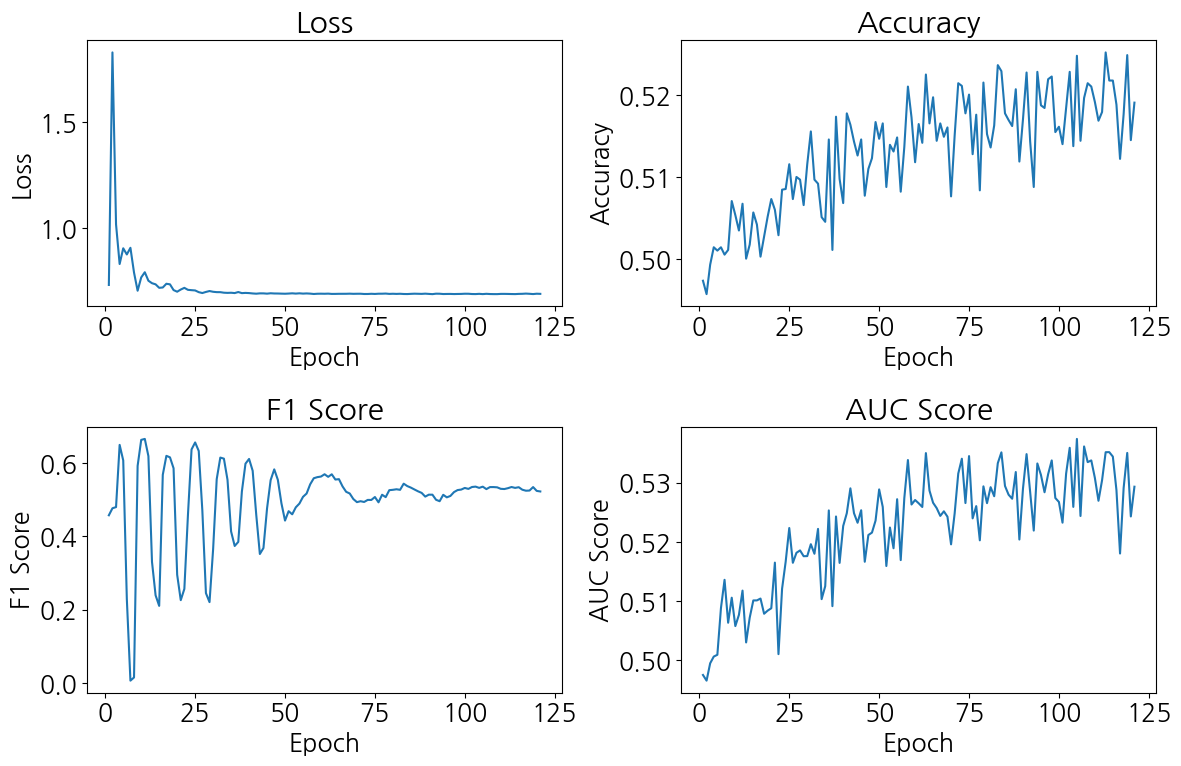

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(range(1, len(all_losses) + 1), all_losses)
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(2, 2, 2)
plt.plot(range(1, len(all_losses) + 1), all_accuracies)
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.subplot(2, 2, 3)
plt.plot(range(1, len(all_losses) + 1), all_f1_scores)
plt.title("F1 Score")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")

plt.subplot(2, 2, 4)
plt.plot(range(1, len(all_losses) + 1), all_auc_scores)
plt.title("AUC Score")
plt.xlabel("Epoch")
plt.ylabel("AUC Score")

plt.tight_layout()
plt.show()

# SEAL

In [ ]:
import pandas as pd

df = pd.read_csv('daangn.csv', encoding='utf-8-sig')
df = df.sample(n=3000, random_state=42)

In [ ]:
df = df.dropna()

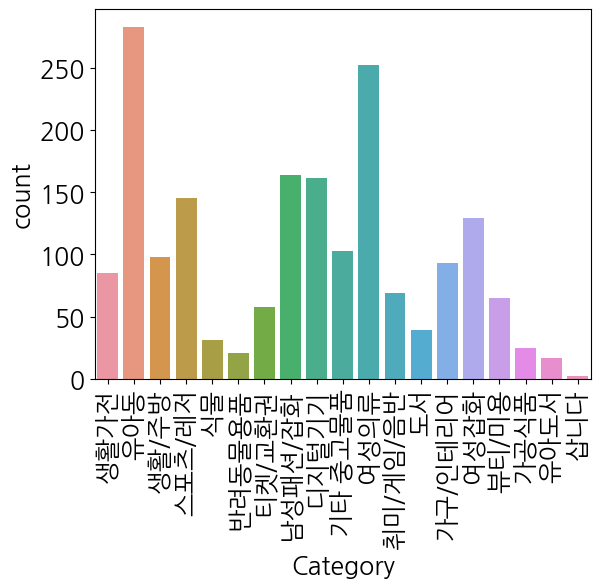

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
from matplotlib import font_manager, rc

warnings.filterwarnings('ignore')

fe = font_manager.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
    name='NanumGothic')
font_manager.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'})

mpl.rcParams['axes.unicode_minus'] = False

plt.xticks(rotation=90)
sns.countplot(x=df['Category']);

In [ ]:
df = df[df['Category'] != '삽니다']

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

import torch
import torch.nn.functional as F
from torch import nn, optim, Tensor

from torch_geometric.utils import structured_negative_sampling
from torch_geometric.nn.conv.gcn_conv import gcn_norm
from torch_geometric.nn import LGConv

In [ ]:
df['up'] = df['Time Posted'].apply(lambda x: 1 if x.startswith('끌올') else 0)

def get_time_in_days(s):
    number = int(''.join(filter(str.isdigit, s)))
    if '일' in s:
        return number
    elif '시간' in s:
        return number / 24.0
    else:
        return 0

df['time'] = df['Time Posted'].apply(get_time_in_days)

df = df.drop(columns=['Description', 'Time Posted'])
df

,Temperature,Title,Category,Price,Interest Count,Chat Count,View Count,up,time
75721,36.8,LG 디오스 광파오븐렌인지(ma323bws) /전자레인지 팝니다,생활가전,"40,000원",11.0,0,350.0,1,4.0
76699,37.9,아동용 외투 잠바 점퍼,유아동,"9,000원",1.0,0,27.0,0,8.0
92991,38.2,빨래건조대,생활/주방,"6,900원",1.0,0,72.0,0,3.0
80917,37.1,전동킥보드 기함급 타우러스X 네고가능,스포츠/레저,175만원,7.0,1,284.0,1,3.0
60767,37.6,차요테 판매해요,식물,"4,000원",3.0,0,200.0,1,7.0
...,...,...,...,...,...,...,...,...,...
27953,44.9,소낭구 장롱,가구/인테리어,"100,000원",20.0,4,1077.0,1,1.0
7395,46.1,ELO 인덕션 1구 (미개봉 새상품),생활가전,"65,000원",0.0,0,56.0,1,3.0
56461,47.1,(M)뉴발란스 반짚업 후드티,남성패션/잡화,"15,000원",2.0,0,54.0,0,13.0
79020,51.3,쿠잉기저귀L,유아동,"5,000원",2.0,2,29.0,0,7.0


In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

def load_glove_model(glove_file_path):
    glove_model = {}
    with open(glove_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:], dtype=np.float64)
            glove_model[word] = embedding
    return glove_model


def get_average_glove(tokens_list, glove_model, vector_size):
    if not tokens_list:
        return np.zeros(vector_size)
    word_vectors = [glove_model[word] for word in tokens_list if word in glove_model]

    if not word_vectors:
        return np.zeros(vector_size)
    else:
        return np.mean(word_vectors, axis=0)

glove_file_path = 'glove.6B.100d.txt'
glove_model = load_glove_model(glove_file_path)

df['Tokenized'] = df['Title'].apply(word_tokenize)
df['Glove_Embedding'] = df['Tokenized'].apply(lambda tokens: get_average_glove(tokens, glove_model, vector_size=100))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df['Price'] = df['Price'].str.replace(',', '').str.extract('(\d+)')
df['Price'] = df['Price'].fillna(0).astype(int)

df['Chat Count'] = df['Chat Count'].fillna(0).astype(int)

In [ ]:
import networkx as nx
from tqdm import tqdm

relations = {
    '유아동': [('유아도서', 9)],
    '스포츠/레저': [('티켓/교환권', 8)],
    '남성패션/잡화': [('여성잡화', 8)],
    '생활가전': [('디지털기기', 8)],
    '디지털기기': [],
    '뷰티/미용': [('여성의류', 8)],
    '가구/인테리어': [('여성의류', 8)],
    '여성의류': [('여성잡화', 9)],
    '여성잡화': [],
    '기타 중고물품': [('반려동물용품', 8)],
    '유아도서': [],
    '티켓/교환권': [],
    '취미/게임/음반': [('티켓/교환권', 8)],
    '생활/주방': [('가구/인테리어', 8)],
    '식물': [],
    '도서': [],
    '반려동물용품': [('기타 중고물품', 8)],
    '가공식품': []
}

In [ ]:
G = nx.Graph()

for idx, row in df.iterrows():
    features = {
        'Temperature': row['Temperature'],
        'Price': row['Price'],
        'Interest_Count': row['Interest Count'],
        'Chat_Count': row['Chat Count'],
        'View_Count': row['View Count'],
        'up': row['up'],
        'time': row['time'],
        'Glove_Embedding': row['Glove_Embedding']
    }
    G.add_node(idx, **features)


for category, related_categories in tqdm(relations.items(), desc='For loop 1'):
    for related_category, score in tqdm(related_categories, desc='For loop 2'):
        source_indices = df[df['Category'] == category].index
        target_indices = df[df['Category'] == related_category].index
        for source_idx in source_indices:
            for target_idx in target_indices:
                G.add_edge(source_idx, target_idx)

For loop 2: 100%|██████████| 1/1 [00:00<00:00, 105.62it/s]

For loop 2: 100%|██████████| 1/1 [00:00<00:00, 92.95it/s]

For loop 2: 100%|██████████| 1/1 [00:00<00:00, 36.67it/s]

For loop 2: 100%|██████████| 1/1 [00:00<00:00, 54.08it/s]

For loop 2: 0it [00:00, ?it/s]
For loop 2: 100%|██████████| 1/1 [00:00<00:00, 42.67it/s]

For loop 2: 100%|██████████| 1/1 [00:00<00:00, 35.98it/s]

For loop 2: 100%|██████████| 1/1 [00:00<00:00, 21.81it/s]

For loop 2: 0it [00:00, ?it/s]

For loop 1:  56%|█████▌    | 10/18 [00:00<00:00, 38.99it/s]
For loop 2: 0it [00:00, ?it/s]

For loop 2: 0it [00:00, ?it/s]

For loop 2: 100%|██████████| 1/1 [00:00<00:00, 165.25it/s]

For loop 2: 100%|██████████| 1/1 [00:00<00:00, 77.08it/s]

For loop 2: 0it [00:00, ?it/s]

For loop 2: 0it [00:00, ?it/s]

For loop 2: 100%|██████████| 1/1 [00:00<00:00, 252.55it/s]

For loop 2: 0it [00:00, ?it/s]
For loop 1: 100%|██████████| 18/18 [00:00<00:00, 54.13it/s]


In [ ]:
from scipy.sparse.csgraph import shortest_path

import torch.nn.functional as F
from torch.nn import Conv1d, MaxPool1d, Linear, Dropout

from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import RandomLinkSplit
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv, aggr
from torch_geometric.utils import k_hop_subgraph, to_scipy_sparse_matrix

In [ ]:
def seal_processing(dataset, edge_label_index, y):
    data_list = []

    for src, dst in tqdm(edge_label_index.t().tolist()):
        sub_nodes, sub_edge_index, mapping, _ = k_hop_subgraph([src, dst], 2, dataset.edge_index, relabel_nodes=True)
        src, dst = mapping.tolist()

        mask1 = (sub_edge_index[0] != src) | (sub_edge_index[1] != dst)
        mask2 = (sub_edge_index[0] != dst) | (sub_edge_index[1] != src)
        sub_edge_index = sub_edge_index[:, mask1 & mask2]

        src, dst = (dst, src) if src > dst else (src, dst)
        adj = to_scipy_sparse_matrix(sub_edge_index, num_nodes=sub_nodes.size(0)).tocsr()

        idx = list(range(src)) + list(range(src + 1, adj.shape[0]))
        adj_wo_src = adj[idx, :][:, idx]

        idx = list(range(dst)) + list(range(dst + 1, adj.shape[0]))
        adj_wo_dst = adj[idx, :][:, idx]

        d_src = shortest_path(adj_wo_dst, directed=False, unweighted=True, indices=src)
        d_src = np.insert(d_src, dst, 0, axis=0)
        d_src = torch.from_numpy(d_src)
        d_dst = shortest_path(adj_wo_src, directed=False, unweighted=True, indices=dst-1)
        d_dst = np.insert(d_dst, src, 0, axis=0)
        d_dst = torch.from_numpy(d_dst)

        dist = d_src + d_dst
        z = 1 + torch.min(d_src, d_dst) + dist // 2 * (dist // 2 + dist % 2 - 1)
        z[src], z[dst], z[torch.isnan(z)] = 1., 1., 0.
        z = z.to(torch.long)

        node_labels = F.one_hot(z, num_classes=200)
        node_emb = dataset.x[sub_nodes]
        node_x = torch.cat([node_emb, node_labels], dim=1)

        data = Data(x=node_x, z=z, edge_index=sub_edge_index, y=y)
        data_list.append(data)

    return data_list

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data
from torch_geometric.utils import negative_sampling
from sklearn.metrics import roc_auc_score
from torch_geometric.utils import from_networkx

data = from_networkx(G)
edges = torch.tensor(list(G.edges)).t().contiguous()

features = [torch.tensor(data.Temperature), torch.tensor(data.Price), torch.tensor(data.Interest_Count),
            torch.tensor(data.Chat_Count), torch.tensor(data.View_Count), torch.tensor(data.up), torch.tensor(data.time), torch.tensor(data.Glove_Embedding)]
features = [f.view(data.Temperature.shape[0], -1) for f in features]
x = torch.cat(features, dim=1)

data.x = x
print(data)

Data(edge_index=[2, 271330], Temperature=[1838], Price=[1838], Interest_Count=[1838], Chat_Count=[1838], View_Count=[1838], up=[1838], time=[1838], Glove_Embedding=[1838, 100], num_nodes=1838, x=[1838, 107])


In [ ]:
def positive_sampling(edge_index, num_pos_samples):
    indices = torch.randperm(edge_index.size(1))[:num_pos_samples]
    return edge_index[:, indices]

In [ ]:
from torch_geometric.transforms import RandomLinkSplit
from torch_geometric.data import DataLoader
from sklearn.preprocessing import StandardScaler
from torch_geometric.utils import train_test_split_edges

transform = RandomLinkSplit(
num_val=0.1,
num_test=0.1,
is_undirected=True,
neg_sampling_ratio=1.0,
)

data.train_mask = data.val_mask = data.test_mask = data.y = None
train_data, val_data, test_data = transform(data)

features_list = [
    data.Temperature, data.Price, data.Interest_Count,
    data.Chat_Count, data.View_Count, data.up, data.time,
    np.array(data.Glove_Embedding.tolist())
]
features = np.column_stack(features_list)
scaler = StandardScaler().fit(features)
features = scaler.transform(features)

for split in (train_data, val_data, test_data):
    split.x = torch.from_numpy(features).float()

for subset in [train_data, val_data, test_data]:
    subset.pos_edge_label_index = positive_sampling(subset.edge_index, num_pos_samples=5000 if subset == train_data else 625)
    subset.neg_edge_label_index = negative_sampling(
        edge_index=subset.edge_index,
        num_nodes=subset.num_nodes,
        num_neg_samples=subset.pos_edge_label_index.size(1)
    )

train_pos_data_list = seal_processing(train_data, train_data.pos_edge_label_index, 1)
train_neg_data_list = seal_processing(train_data, train_data.neg_edge_label_index, 0)

val_pos_data_list = seal_processing(val_data, val_data.pos_edge_label_index, 1)
val_neg_data_list = seal_processing(val_data, val_data.neg_edge_label_index, 0)

test_pos_data_list = seal_processing(test_data, test_data.pos_edge_label_index, 1)
test_neg_data_list = seal_processing(test_data, test_data.neg_edge_label_index, 0)

train_dataset = train_pos_data_list + train_neg_data_list
val_dataset = val_pos_data_list + val_neg_data_list
test_dataset = test_pos_data_list + test_neg_data_list

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

100%|██████████| 625/625 [00:16<00:00, 38.31it/s]


In [ ]:
print(train_data)

Data(edge_index=[2, 217066], Temperature=[1838], Price=[1838], Interest_Count=[1838], Chat_Count=[1838], View_Count=[1838], up=[1838], time=[1838], Glove_Embedding=[1838, 100], num_nodes=1838, x=[1838, 107], edge_label=[217066], edge_label_index=[2, 217066], pos_edge_label_index=[2, 5000], neg_edge_label_index=[2, 5000])


In [ ]:
class DGCNN(torch.nn.Module):
    def __init__(self, dim_in, k=30):
        super().__init__()
        self.gcn1 = GCNConv(dim_in, 32)
        self.gcn2 = GCNConv(32, 32)
        self.gcn3 = GCNConv(32, 32)
        self.gcn4 = GCNConv(32, 1)

        self.global_pool = aggr.SortAggregation(k=k)

        self.conv1 = Conv1d(1, 16, 97, 97)
        self.conv2 = Conv1d(16, 32, 5, 1)
        self.maxpool = MaxPool1d(2, 2)

        self.linear1 = Linear(352, 128)
        self.dropout = Dropout(0.5)
        self.linear2 = Linear(128, 1)

    def forward(self, x, edge_index, batch):
        h1 = self.gcn1(x, edge_index).tanh()
        h2 = self.gcn2(h1, edge_index).tanh()
        h3 = self.gcn3(h2, edge_index).tanh()
        h4 = self.gcn4(h3, edge_index).tanh()
        h = torch.cat([h1, h2, h3, h4], dim=-1)

        h = self.global_pool(h, batch)
        h = h.view(h.size(0), 1, h.size(-1))
        h = self.conv1(h).relu()
        h = self.maxpool(h)
        h = self.conv2(h).relu()
        h = h.view(h.size(0), -1)
        h = self.linear1(h).relu()
        h = self.dropout(h)
        h = self.linear2(h).sigmoid()
        return h

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from torch.nn import BCEWithLogitsLoss

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = DGCNN(train_dataset[0].num_features).to(device)
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)
criterion = BCEWithLogitsLoss()

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
train_f1_scores = []
val_f1_scores = []
train_auc_scores = []
val_auc_scores = []

def train():
    model.train()
    total_loss = 0
    y_pred, y_true = [], []

    for data in tqdm(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data.x, data.edge_index, data.batch)
        loss = criterion(out.view(-1), data.y.to(torch.float))
        loss.backward()
        optimizer.step()
        total_loss += float(loss) * data.num_graphs

        pred = out.view(-1).sigmoid() > 0.5
        y_pred.append(pred.detach())
        y_true.append(data.y.view(-1))

    y_true_concat = torch.cat(y_true).to(torch.float).cpu()
    y_pred_concat = torch.cat(y_pred).to(torch.float).cpu()
    train_accuracy = accuracy_score(y_true_concat, y_pred_concat)
    train_f1 = f1_score(y_true_concat, y_pred_concat)
    train_auc = roc_auc_score(y_true_concat, y_pred_concat)

    return total_loss / len(train_dataset), train_accuracy, train_f1, train_auc

@torch.no_grad()
def test(loader):
    model.eval()
    y_pred, y_true = [], []

    for data in loader:
        data = data.to(device)
        out = model(data.x, data.edge_index, data.batch)
        pred = out.view(-1).sigmoid() > 0.5
        y_pred.append(pred)
        y_true.append(data.y.view(-1))

    y_true_concat = torch.cat(y_true).to(torch.float).cpu()
    y_pred_concat = torch.cat(y_pred).to(torch.float).cpu()
    accuracy = accuracy_score(y_true_concat, y_pred_concat)
    f1 = f1_score(y_true_concat, y_pred_concat)
    auc = roc_auc_score(y_true_concat, y_pred_concat)

    return accuracy, f1, auc

for epoch in range(31):
    train_loss, train_accuracy, train_f1, train_auc = train()
    val_accuracy, val_f1, val_auc = test(val_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    train_f1_scores.append(train_f1)
    val_f1_scores.append(val_f1)
    train_auc_scores.append(train_auc)
    val_auc_scores.append(val_auc)

    print(f'Epoch {epoch:>2} | Train Loss: {train_loss:.4f} | Train Accuracy: {train_accuracy:.4f} | '
          f'Train F1 Score: {train_f1:.4f} | Train AUC: {train_auc:.4f}')
    print(f'Val Accuracy: {val_accuracy:.4f} | Val F1 Score: {val_f1:.4f} | Val AUC: {val_auc:.4f}')
    print()

test_accuracy, test_f1, test_auc = test(test_loader)
print(f'Test Accuracy: {test_accuracy:.4f} | Test F1 Score {test_f1:.4f} | Test AUC {test_auc:.4f}')

100%|██████████| 313/313 [00:37<00:00,  8.38it/s]


Epoch  0 | Train Loss: 0.6121 | Train Accuracy: 0.5011 | Train F1 Score: 0.6672 | Train AUC: 0.5011
Val Accuracy: 0.5000 | Val F1 Score: 0.6667 | Val AUC: 0.5000



100%|██████████| 313/313 [00:36<00:00,  8.48it/s]


Epoch  1 | Train Loss: 0.5185 | Train Accuracy: 0.6673 | Train F1 Score: 0.7504 | Train AUC: 0.6673
Val Accuracy: 0.8168 | Val F1 Score: 0.8452 | Val AUC: 0.8168



100%|██████████| 313/313 [00:37<00:00,  8.34it/s]


Epoch  2 | Train Loss: 0.5147 | Train Accuracy: 0.9072 | Train F1 Score: 0.9151 | Train AUC: 0.9072
Val Accuracy: 0.9680 | Val F1 Score: 0.9690 | Val AUC: 0.9680



100%|██████████| 313/313 [00:37<00:00,  8.31it/s]


Epoch  3 | Train Loss: 0.5097 | Train Accuracy: 0.9682 | Train F1 Score: 0.9692 | Train AUC: 0.9682
Val Accuracy: 0.9712 | Val F1 Score: 0.9720 | Val AUC: 0.9712



100%|██████████| 313/313 [00:37<00:00,  8.35it/s]


Epoch  4 | Train Loss: 0.5090 | Train Accuracy: 0.9715 | Train F1 Score: 0.9723 | Train AUC: 0.9715
Val Accuracy: 0.9728 | Val F1 Score: 0.9735 | Val AUC: 0.9728



100%|██████████| 313/313 [00:37<00:00,  8.33it/s]


Epoch  5 | Train Loss: 0.5089 | Train Accuracy: 0.9743 | Train F1 Score: 0.9749 | Train AUC: 0.9743
Val Accuracy: 0.9736 | Val F1 Score: 0.9743 | Val AUC: 0.9736



100%|██████████| 313/313 [00:37<00:00,  8.30it/s]


Epoch  6 | Train Loss: 0.5088 | Train Accuracy: 0.9765 | Train F1 Score: 0.9770 | Train AUC: 0.9765
Val Accuracy: 0.9744 | Val F1 Score: 0.9750 | Val AUC: 0.9744



100%|██████████| 313/313 [00:37<00:00,  8.34it/s]


Epoch  7 | Train Loss: 0.5088 | Train Accuracy: 0.9783 | Train F1 Score: 0.9788 | Train AUC: 0.9783
Val Accuracy: 0.9776 | Val F1 Score: 0.9781 | Val AUC: 0.9776



100%|██████████| 313/313 [00:37<00:00,  8.41it/s]


Epoch  8 | Train Loss: 0.5088 | Train Accuracy: 0.9785 | Train F1 Score: 0.9790 | Train AUC: 0.9785
Val Accuracy: 0.9744 | Val F1 Score: 0.9750 | Val AUC: 0.9744



100%|██████████| 313/313 [00:37<00:00,  8.35it/s]


Epoch  9 | Train Loss: 0.5088 | Train Accuracy: 0.9806 | Train F1 Score: 0.9810 | Train AUC: 0.9806
Val Accuracy: 0.9776 | Val F1 Score: 0.9781 | Val AUC: 0.9776



100%|██████████| 313/313 [00:37<00:00,  8.35it/s]


Epoch 10 | Train Loss: 0.5088 | Train Accuracy: 0.9798 | Train F1 Score: 0.9802 | Train AUC: 0.9798
Val Accuracy: 0.9808 | Val F1 Score: 0.9812 | Val AUC: 0.9808



100%|██████████| 313/313 [00:37<00:00,  8.34it/s]


Epoch 11 | Train Loss: 0.5088 | Train Accuracy: 0.9820 | Train F1 Score: 0.9823 | Train AUC: 0.9820
Val Accuracy: 0.9760 | Val F1 Score: 0.9766 | Val AUC: 0.9760



100%|██████████| 313/313 [00:37<00:00,  8.36it/s]


Epoch 12 | Train Loss: 0.5091 | Train Accuracy: 0.9842 | Train F1 Score: 0.9844 | Train AUC: 0.9842
Val Accuracy: 0.9832 | Val F1 Score: 0.9835 | Val AUC: 0.9832



100%|██████████| 313/313 [00:37<00:00,  8.38it/s]


Epoch 13 | Train Loss: 0.5086 | Train Accuracy: 0.9866 | Train F1 Score: 0.9868 | Train AUC: 0.9866
Val Accuracy: 0.9832 | Val F1 Score: 0.9835 | Val AUC: 0.9832



100%|██████████| 313/313 [00:37<00:00,  8.36it/s]


Epoch 14 | Train Loss: 0.5086 | Train Accuracy: 0.9866 | Train F1 Score: 0.9868 | Train AUC: 0.9866
Val Accuracy: 0.9840 | Val F1 Score: 0.9843 | Val AUC: 0.9840



100%|██████████| 313/313 [00:37<00:00,  8.32it/s]


Epoch 15 | Train Loss: 0.5086 | Train Accuracy: 0.9872 | Train F1 Score: 0.9874 | Train AUC: 0.9872
Val Accuracy: 0.9848 | Val F1 Score: 0.9850 | Val AUC: 0.9848



100%|██████████| 313/313 [00:37<00:00,  8.36it/s]


Epoch 16 | Train Loss: 0.5090 | Train Accuracy: 0.9856 | Train F1 Score: 0.9858 | Train AUC: 0.9856
Val Accuracy: 0.9760 | Val F1 Score: 0.9766 | Val AUC: 0.9760



100%|██████████| 313/313 [00:37<00:00,  8.39it/s]


Epoch 17 | Train Loss: 0.5093 | Train Accuracy: 0.9838 | Train F1 Score: 0.9841 | Train AUC: 0.9838
Val Accuracy: 0.9848 | Val F1 Score: 0.9850 | Val AUC: 0.9848



100%|██████████| 313/313 [00:37<00:00,  8.41it/s]


Epoch 18 | Train Loss: 0.5086 | Train Accuracy: 0.9885 | Train F1 Score: 0.9886 | Train AUC: 0.9885
Val Accuracy: 0.9848 | Val F1 Score: 0.9850 | Val AUC: 0.9848



100%|██████████| 313/313 [00:37<00:00,  8.35it/s]


Epoch 19 | Train Loss: 0.5086 | Train Accuracy: 0.9886 | Train F1 Score: 0.9887 | Train AUC: 0.9886
Val Accuracy: 0.9848 | Val F1 Score: 0.9850 | Val AUC: 0.9848



100%|██████████| 313/313 [00:37<00:00,  8.38it/s]


Epoch 20 | Train Loss: 0.5086 | Train Accuracy: 0.9884 | Train F1 Score: 0.9885 | Train AUC: 0.9884
Val Accuracy: 0.9848 | Val F1 Score: 0.9850 | Val AUC: 0.9848



100%|██████████| 313/313 [00:37<00:00,  8.32it/s]


Epoch 21 | Train Loss: 0.5086 | Train Accuracy: 0.9880 | Train F1 Score: 0.9881 | Train AUC: 0.9880
Val Accuracy: 0.9848 | Val F1 Score: 0.9850 | Val AUC: 0.9848



100%|██████████| 313/313 [00:37<00:00,  8.31it/s]


Epoch 22 | Train Loss: 0.5086 | Train Accuracy: 0.9883 | Train F1 Score: 0.9884 | Train AUC: 0.9883
Val Accuracy: 0.9848 | Val F1 Score: 0.9850 | Val AUC: 0.9848



100%|██████████| 313/313 [00:37<00:00,  8.38it/s]


Epoch 23 | Train Loss: 0.5086 | Train Accuracy: 0.9889 | Train F1 Score: 0.9890 | Train AUC: 0.9889
Val Accuracy: 0.9848 | Val F1 Score: 0.9850 | Val AUC: 0.9848



100%|██████████| 313/313 [00:37<00:00,  8.33it/s]


Epoch 24 | Train Loss: 0.5086 | Train Accuracy: 0.9888 | Train F1 Score: 0.9889 | Train AUC: 0.9888
Val Accuracy: 0.9848 | Val F1 Score: 0.9850 | Val AUC: 0.9848



100%|██████████| 313/313 [00:37<00:00,  8.38it/s]


Epoch 25 | Train Loss: 0.5086 | Train Accuracy: 0.9889 | Train F1 Score: 0.9890 | Train AUC: 0.9889
Val Accuracy: 0.9848 | Val F1 Score: 0.9850 | Val AUC: 0.9848



100%|██████████| 313/313 [00:37<00:00,  8.32it/s]


Epoch 26 | Train Loss: 0.5088 | Train Accuracy: 0.9880 | Train F1 Score: 0.9881 | Train AUC: 0.9880
Val Accuracy: 0.9832 | Val F1 Score: 0.9835 | Val AUC: 0.9832



100%|██████████| 313/313 [00:37<00:00,  8.38it/s]


Epoch 27 | Train Loss: 0.5086 | Train Accuracy: 0.9888 | Train F1 Score: 0.9889 | Train AUC: 0.9888
Val Accuracy: 0.9848 | Val F1 Score: 0.9850 | Val AUC: 0.9848



100%|██████████| 313/313 [00:37<00:00,  8.34it/s]


Epoch 28 | Train Loss: 0.5086 | Train Accuracy: 0.9884 | Train F1 Score: 0.9885 | Train AUC: 0.9884
Val Accuracy: 0.9848 | Val F1 Score: 0.9850 | Val AUC: 0.9848



100%|██████████| 313/313 [00:37<00:00,  8.36it/s]


Epoch 29 | Train Loss: 0.5086 | Train Accuracy: 0.9884 | Train F1 Score: 0.9885 | Train AUC: 0.9884
Val Accuracy: 0.9848 | Val F1 Score: 0.9850 | Val AUC: 0.9848



100%|██████████| 313/313 [00:37<00:00,  8.35it/s]


Epoch 30 | Train Loss: 0.5086 | Train Accuracy: 0.9883 | Train F1 Score: 0.9884 | Train AUC: 0.9883
Val Accuracy: 0.9848 | Val F1 Score: 0.9850 | Val AUC: 0.9848

Test Accuracy: 0.9864 | Test F1 Score 0.9866 | Test AUC 0.9864


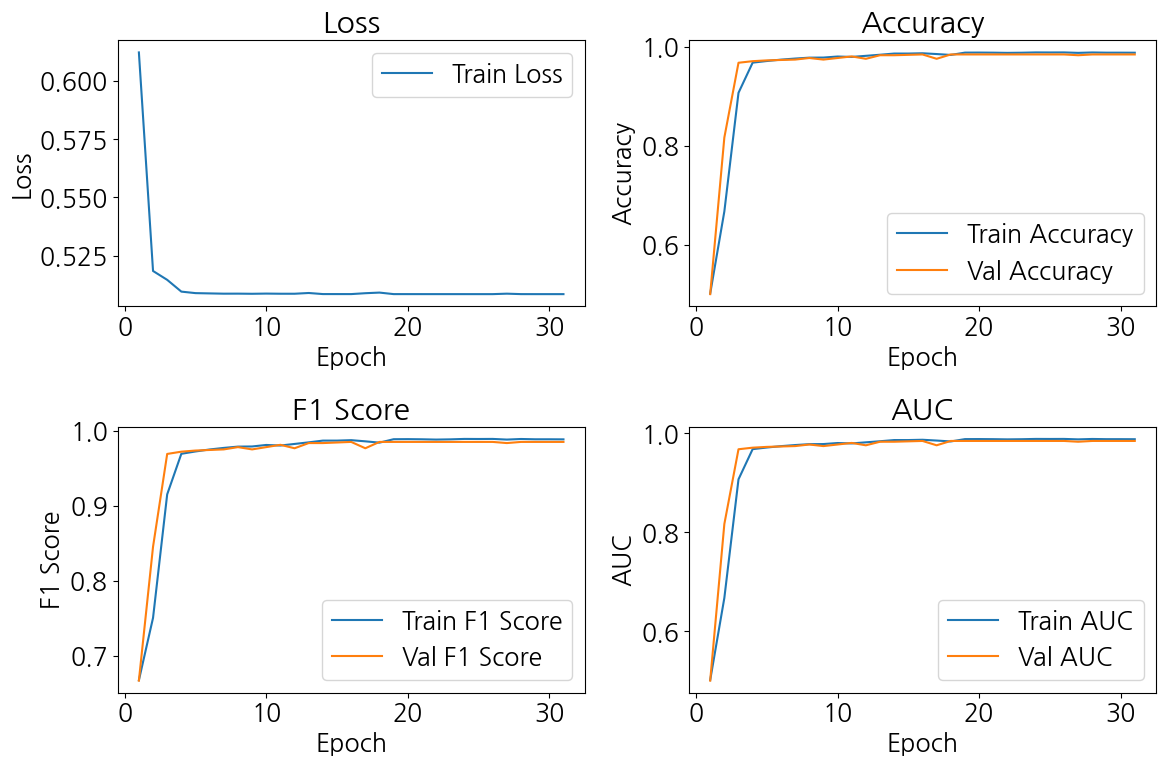

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Val Accuracy')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(range(1, len(train_f1_scores) + 1), train_f1_scores, label='Train F1 Score')
plt.plot(range(1, len(val_f1_scores) + 1), val_f1_scores, label='Val F1 Score')
plt.title("F1 Score")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(range(1, len(train_auc_scores) + 1), train_auc_scores, label='Train AUC')
plt.plot(range(1, len(val_auc_scores) + 1), val_auc_scores, label='Val AUC')
plt.title("AUC")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

plt.tight_layout()
plt.show()

# Logistic Regression

In [ ]:
features = [torch.tensor(data.Temperature), torch.tensor(data.Price), torch.tensor(data.Interest_Count),
            torch.tensor(data.Chat_Count), torch.tensor(data.View_Count), torch.tensor(data.up), torch.tensor(data.time), torch.tensor(data.Glove_Embedding)]
features = [f.view(data.Temperature.shape[0], -1) for f in features]
x = torch.cat(features, dim=1)

data.x = x

node_features = data.x

scaler = StandardScaler()
node_features_normalized = scaler.fit_transform(node_features)

data.x = torch.tensor(node_features_normalized, dtype=torch.float)

print(data)

Data(edge_index=[2, 25699844], Temperature=[12270], Price=[12270], Interest_Count=[12270], Chat_Count=[12270], View_Count=[12270], up=[12270], time=[12270], Glove_Embedding=[12270, 100], num_nodes=12270, x=[12270, 7])


In [ ]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        logits = self.linear(x)
        predictions = torch.sigmoid(logits)
        return predictions

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score

model = LogisticRegression(input_dim=data.num_features)
optimizer = torch.optim.Adam(model.parameters(), lr=0.05, weight_decay=1e-4)
criterion = torch.nn.BCEWithLogitsLoss()
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)

def get_link_labels(pos_edge_index, neg_edge_index):
    E = pos_edge_index.size(1) + neg_edge_index.size(1)
    link_labels = torch.zeros(E, dtype=torch.float)
    link_labels[:pos_edge_index.size(1)] = 1.
    return link_labels

def train(data, model, optimizer, epochs=500, patience=30):
    all_losses = []
    all_accuracies = []
    all_f1_scores = []
    all_auc_scores = []

    best_loss = float('inf')
    patience_counter = 0
    model.train()

    for epoch in range(epochs):
        optimizer.zero_grad()

        pos_edge_index = positive_sampling(data.edge_index, num_pos_samples=6135)
        neg_edge_index = negative_sampling(pos_edge_index, num_neg_samples=6135)

        edge_index = torch.cat([pos_edge_index, neg_edge_index], dim=-1)
        edge_label = get_link_labels(pos_edge_index=pos_edge_index, neg_edge_index=neg_edge_index)

        edge_out = model(data.x.float())
        edge_out = edge_out.view(-1)
        loss = criterion(edge_out, edge_label.float())

        loss.backward()
        optimizer.step()
        scheduler.step()

        pred_prob = torch.sigmoid(edge_out)
        pred = (pred_prob > 0.5).int()
        acc = (pred == edge_label.int()).sum().float() / len(edge_label)

        f1 = f1_score(edge_label.int().cpu().detach().numpy(), pred.cpu().detach().numpy())
        auc = roc_auc_score(edge_label.int().cpu().detach().numpy(), pred_prob.cpu().detach().numpy())

        all_losses.append(loss.item())
        all_accuracies.append(acc)
        all_f1_scores.append(f1)
        all_auc_scores.append(auc)

        print(f"Epoch: {epoch + 1}, Loss: {loss:.4f}, Acc: {acc:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

        if loss < best_loss:
            best_loss = loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Stopping early due to lack of improvement in loss.")
                break

    return all_losses, all_accuracies, all_f1_scores, all_auc_scores

all_losses, all_accuracies, all_f1_scores, all_auc_scores = train(data, model, optimizer)

Epoch: 1, Loss: 0.7291, Acc: 0.5000, F1: 0.6667, AUC: 0.5022
Epoch: 2, Loss: 0.7272, Acc: 0.5000, F1: 0.6667, AUC: 0.5042
Epoch: 3, Loss: 0.7253, Acc: 0.5000, F1: 0.6667, AUC: 0.5053
Epoch: 4, Loss: 0.7236, Acc: 0.5000, F1: 0.6667, AUC: 0.5062
Epoch: 5, Loss: 0.7219, Acc: 0.5000, F1: 0.6667, AUC: 0.5071
Epoch: 6, Loss: 0.7203, Acc: 0.5000, F1: 0.6667, AUC: 0.5079
Epoch: 7, Loss: 0.7188, Acc: 0.5000, F1: 0.6667, AUC: 0.5092
Epoch: 8, Loss: 0.7173, Acc: 0.5000, F1: 0.6667, AUC: 0.5112
Epoch: 9, Loss: 0.7158, Acc: 0.5000, F1: 0.6667, AUC: 0.5139
Epoch: 10, Loss: 0.7143, Acc: 0.5000, F1: 0.6667, AUC: 0.5163
Epoch: 11, Loss: 0.7130, Acc: 0.5000, F1: 0.6667, AUC: 0.5177
Epoch: 12, Loss: 0.7118, Acc: 0.5000, F1: 0.6667, AUC: 0.5202
Epoch: 13, Loss: 0.7108, Acc: 0.5000, F1: 0.6667, AUC: 0.5197
Epoch: 14, Loss: 0.7098, Acc: 0.5000, F1: 0.6667, AUC: 0.5183
Epoch: 15, Loss: 0.7089, Acc: 0.5000, F1: 0.6667, AUC: 0.5179
Epoch: 16, Loss: 0.7080, Acc: 0.5000, F1: 0.6667, AUC: 0.5182
Epoch: 17, Loss: 

In [ ]:
model.eval()
with torch.no_grad():
    pos_edge_index = positive_sampling(data.edge_index, num_pos_samples=6135)
    neg_edge_index = negative_sampling(pos_edge_index, data.x.size(0), num_neg_samples=6135)

    edge_index = torch.cat([pos_edge_index, neg_edge_index], dim=-1)
    edge_label = get_link_labels(pos_edge_index=pos_edge_index, neg_edge_index=neg_edge_index)

    edge_out = model(data.x.float())
    edge_out = edge_out.view(-1)
    loss = criterion(edge_out, edge_label.float())

    pred_prob = torch.sigmoid(edge_out)
    pred = (pred_prob > 0.5).int()
    acc = (pred == edge_label.int()).sum().float() / len(edge_label)

    f1 = f1_score(edge_label.int().cpu().detach().numpy(), pred.cpu().detach().numpy())
    auc = roc_auc_score(edge_label.int().cpu().detach().numpy(), pred_prob.cpu().detach().numpy())

    print(f"Loss: {loss:.4f}, Acc: {acc:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}")

Loss: 0.6950, Acc: 0.5000, F1: 0.6667, AUC: 0.5203


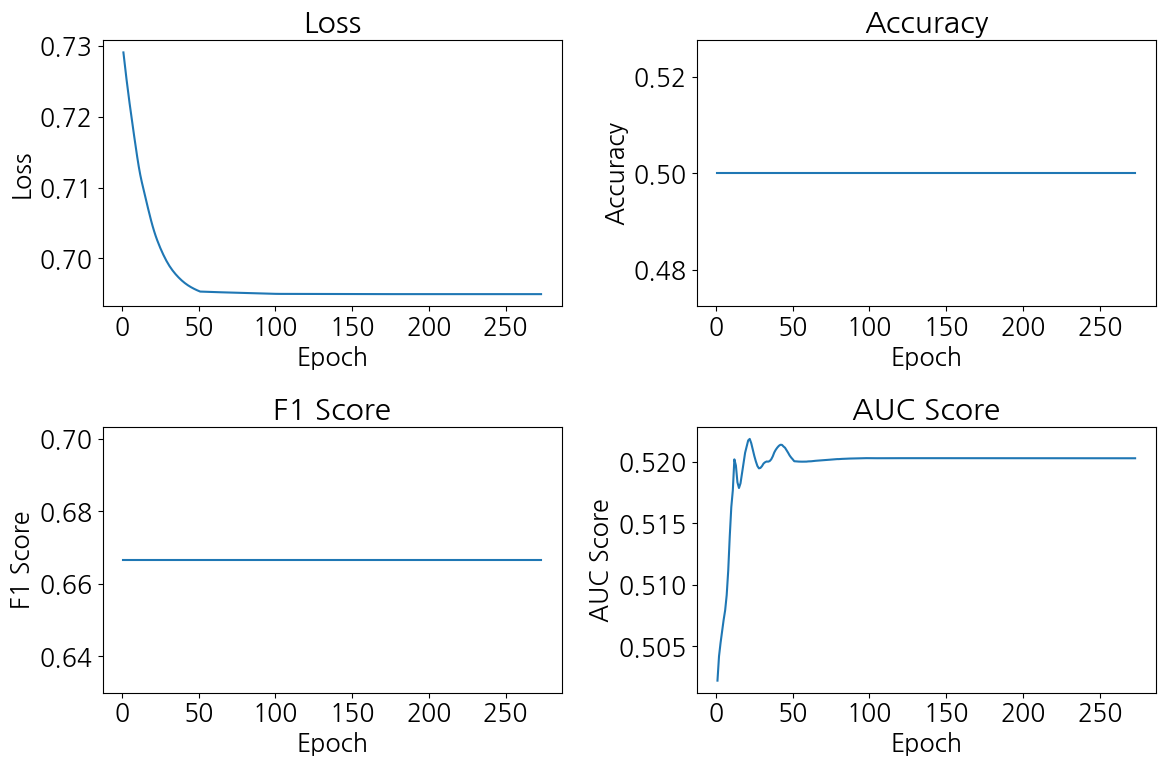

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(range(1, len(all_losses) + 1), all_losses)
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(2, 2, 2)
plt.plot(range(1, len(all_losses) + 1), all_accuracies)
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.subplot(2, 2, 3)
plt.plot(range(1, len(all_losses) + 1), all_f1_scores)
plt.title("F1 Score")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")

plt.subplot(2, 2, 4)
plt.plot(range(1, len(all_losses) + 1), all_auc_scores)
plt.title("AUC Score")
plt.xlabel("Epoch")
plt.ylabel("AUC Score")

plt.tight_layout()
plt.show()

# LMKE

In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import pandas as pd
import numpy as np

tokenizer = BertTokenizer.from_pretrained('klue/bert-base')
model = BertModel.from_pretrained('klue/bert-base')

In [ ]:
def get_bert_embedding(text, tokenizer, model):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

    outputs = model(**inputs)

    embeddings = outputs.last_hidden_state
    mean_embedding = torch.mean(embeddings, 1)

    return mean_embedding[0].detach().numpy()

df['BERT_Embedding'] = df['Title'].apply(lambda x: get_bert_embedding(x, tokenizer, model))

In [ ]:
G = nx.Graph()

for idx, row in df.iterrows():
    features = {
        'Temperature': row['Temperature'],
        'Price': row['Price'],
        'Interest_Count': row['Interest Count'],
        'Chat_Count': row['Chat Count'],
        'View_Count': row['View Count'],
        'up': row['up'],
        'time': row['time'],
        'BERT_Embedding': row['BERT_Embedding']
    }
    G.add_node(idx, **features)


for category, related_categories in tqdm(relations.items(), desc='For loop 1'):
    for related_category, score in tqdm(related_categories, desc='For loop 2'):
        source_indices = df[df['Category'] == category].index
        target_indices = df[df['Category'] == related_category].index
        for source_idx in source_indices:
            for target_idx in target_indices:
                G.add_edge(source_idx, target_idx)

For loop 2: 100%|██████████| 1/1 [00:00<00:00, 122.18it/s]

For loop 2: 100%|██████████| 1/1 [00:00<00:00, 82.10it/s]

For loop 2: 100%|██████████| 1/1 [00:00<00:00, 39.48it/s]

For loop 2: 100%|██████████| 1/1 [00:00<00:00, 61.21it/s]

For loop 2: 0it [00:00, ?it/s]

For loop 2: 100%|██████████| 1/1 [00:00<00:00, 34.37it/s]

For loop 2: 100%|██████████| 1/1 [00:00<00:00, 23.21it/s]

For loop 2: 0it [00:00, ?it/s]

For loop 2: 100%|██████████| 1/1 [00:00<00:00, 255.02it/s]

For loop 2: 0it [00:00, ?it/s]
For loop 1:  61%|██████    | 11/18 [00:00<00:00, 47.81it/s]
For loop 2: 0it [00:00, ?it/s]

For loop 2: 100%|██████████| 1/1 [00:00<00:00, 121.12it/s]

For loop 2: 100%|██████████| 1/1 [00:00<00:00, 72.60it/s]

For loop 2: 0it [00:00, ?it/s]

For loop 2: 0it [00:00, ?it/s]

For loop 2: 100%|██████████| 1/1 [00:00<00:00, 245.63it/s]

For loop 2: 0it [00:00, ?it/s]
For loop 1: 100%|██████████| 18/18 [00:00<00:00, 59.43it/s]


In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from torch_geometric.utils import negative_sampling
from sklearn.metrics import roc_auc_score
from torch_geometric.utils import from_networkx

data = from_networkx(G)
edges = torch.tensor(list(G.edges)).t().contiguous()

features = [torch.tensor(data.Temperature), torch.tensor(data.Price), torch.tensor(data.Interest_Count),
            torch.tensor(data.Chat_Count), torch.tensor(data.View_Count), torch.tensor(data.up), torch.tensor(data.time), torch.tensor(data.BERT_Embedding)]
features = [f.view(data.Temperature.shape[0], -1) for f in features]
x = torch.cat(features, dim=1)

data.x = x
print(data)

Data(edge_index=[2, 271330], Temperature=[1838], Price=[1838], Interest_Count=[1838], Chat_Count=[1838], View_Count=[1838], up=[1838], time=[1838], BERT_Embedding=[1838, 768], num_nodes=1838, x=[1838, 775])


In [ ]:
def seal_processing(dataset, edge_label_index, y):
    data_list = []

    for src, dst in tqdm(edge_label_index.t().tolist()):
        sub_nodes, sub_edge_index, mapping, _ = k_hop_subgraph([src, dst], 2, dataset.edge_index, relabel_nodes=True)
        src, dst = mapping.tolist()

        mask1 = (sub_edge_index[0] != src) | (sub_edge_index[1] != dst)
        mask2 = (sub_edge_index[0] != dst) | (sub_edge_index[1] != src)
        sub_edge_index = sub_edge_index[:, mask1 & mask2]

        src, dst = (dst, src) if src > dst else (src, dst)
        adj = to_scipy_sparse_matrix(sub_edge_index, num_nodes=sub_nodes.size(0)).tocsr()

        idx = list(range(src)) + list(range(src + 1, adj.shape[0]))
        adj_wo_src = adj[idx, :][:, idx]

        idx = list(range(dst)) + list(range(dst + 1, adj.shape[0]))
        adj_wo_dst = adj[idx, :][:, idx]

        d_src = shortest_path(adj_wo_dst, directed=False, unweighted=True, indices=src)
        d_src = np.insert(d_src, dst, 0, axis=0)
        d_src = torch.from_numpy(d_src)
        d_dst = shortest_path(adj_wo_src, directed=False, unweighted=True, indices=dst-1)
        d_dst = np.insert(d_dst, src, 0, axis=0)
        d_dst = torch.from_numpy(d_dst)

        dist = d_src + d_dst
        z = 1 + torch.min(d_src, d_dst) + dist // 2 * (dist // 2 + dist % 2 - 1)
        z[src], z[dst], z[torch.isnan(z)] = 1., 1., 0.
        z = z.to(torch.long)

        node_labels = F.one_hot(z, num_classes=200)
        node_emb = dataset.x[sub_nodes]
        node_x = torch.cat([node_emb, node_labels], dim=1)

        data = Data(x=node_x, z=z, edge_index=sub_edge_index, y=y)
        data_list.append(data)

    return data_list

In [ ]:
def positive_sampling(edge_index, num_pos_samples):
    indices = torch.randperm(edge_index.size(1))[:num_pos_samples]
    return edge_index[:, indices]

In [ ]:
from scipy.sparse.csgraph import shortest_path

import torch.nn.functional as F
from torch.nn import Conv1d, MaxPool1d, Linear, Dropout

from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import RandomLinkSplit
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv, aggr
from torch_geometric.utils import k_hop_subgraph, to_scipy_sparse_matrix

In [ ]:
from sklearn.decomposition import PCA

def reduce_dimensions(embeddings, target_dims=100):
    pca = PCA(n_components=target_dims)
    reduced_embeddings = pca.fit_transform(embeddings)
    explained_variance = pca.explained_variance_ratio_.sum()
    print(f"Explained variance with {target_dims} dimensions: {explained_variance:.2f}")
    return reduced_embeddings

In [ ]:
from torch_geometric.transforms import RandomLinkSplit
from torch_geometric.data import DataLoader
from sklearn.preprocessing import StandardScaler
from torch_geometric.utils import train_test_split_edges

transform = RandomLinkSplit(
num_val=0.1,
num_test=0.1,
is_undirected=True,
neg_sampling_ratio=1.0,
)

data.train_mask = data.val_mask = data.test_mask = data.y = None
train_data, val_data, test_data = transform(data)

features_list = [
    data.Temperature, data.Price, data.Interest_Count,
    data.Chat_Count, data.View_Count, data.up, data.time
]
features = np.hstack([f.reshape(-1, 1) if f.ndim == 1 else f for f in features_list])

reduced_embeddings = reduce_dimensions(data.BERT_Embedding, target_dims=121)
reduced_embeddings = reduced_embeddings.astype(np.float32)
features = np.hstack((features, reduced_embeddings))

scaler = StandardScaler().fit(features)
features = scaler.transform(features).astype(np.float32)

features_tensor = torch.from_numpy(features)

for split in (train_data, val_data, test_data):
    split.x = features_tensor

for subset in [train_data, val_data, test_data]:
    subset.pos_edge_label_index = positive_sampling(subset.edge_index, num_pos_samples=5000 if subset == train_data else 625)
    subset.neg_edge_label_index = negative_sampling(
        edge_index=subset.edge_index,
        num_nodes=subset.num_nodes,
        num_neg_samples=subset.pos_edge_label_index.size(1)
    )

train_pos_data_list = seal_processing(train_data, train_data.pos_edge_label_index, 1)
train_neg_data_list = seal_processing(train_data, train_data.neg_edge_label_index, 0)

val_pos_data_list = seal_processing(val_data, val_data.pos_edge_label_index, 1)
val_neg_data_list = seal_processing(val_data, val_data.neg_edge_label_index, 0)

test_pos_data_list = seal_processing(test_data, test_data.pos_edge_label_index, 1)
test_neg_data_list = seal_processing(test_data, test_data.neg_edge_label_index, 0)

train_dataset = train_pos_data_list + train_neg_data_list
val_dataset = val_pos_data_list + val_neg_data_list
test_dataset = test_pos_data_list + test_neg_data_list

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

Explained variance with 121 dimensions: 0.86


100%|██████████| 625/625 [00:16<00:00, 38.32it/s]


In [ ]:
print(train_data)

Data(edge_index=[2, 217066], Temperature=[1838], Price=[1838], Interest_Count=[1838], Chat_Count=[1838], View_Count=[1838], up=[1838], time=[1838], BERT_Embedding=[1838, 768], num_nodes=1838, x=[1838, 128], edge_label=[217066], edge_label_index=[2, 217066], pos_edge_label_index=[2, 5000], neg_edge_label_index=[2, 5000])


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_sort_pool
from torch.nn import Conv1d, MaxPool1d, Linear, Dropout, BatchNorm1d

class DGCNN_LMKE(torch.nn.Module):
    def __init__(self, n_features, dim_in, k=30):
        super().__init__()

        self.n_bert_features = 121
        self.n_additional_features = n_features - self.n_bert_features

        self.bert_embeddings = nn.Linear(self.n_bert_features, dim_in)
        self.additional_features_embedding = nn.Linear(self.n_additional_features, dim_in)

        self.bn = BatchNorm1d(dim_in * 2)

        self.attention = nn.MultiheadAttention(embed_dim=dim_in * 2, num_heads=4)

        self.gcn1 = GCNConv(dim_in * 2, 32)
        self.gcn2 = GCNConv(32, 1)

        self.global_pool = aggr.SortAggregation(k=k)

        self.conv1 = Conv1d(1, 16, 33, 33)
        self.conv2 = Conv1d(16, 32, 5, 1)
        self.maxpool = MaxPool1d(2, 2)

        self.linear1 = Linear(352, 128)
        self.dropout = Dropout(0.5)
        self.linear2 = Linear(128, 1)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch

        bert_features = x[:, -self.n_bert_features:]
        additional_features = x[:, :self.n_additional_features]

        bert_features = F.relu(self.bert_embeddings(bert_features))
        additional_features = F.relu(self.additional_features_embedding(additional_features))

        x = torch.cat((additional_features, bert_features), dim=1)

        x = self.bn(x)
        x = x.unsqueeze(0)

        x, _ = self.attention(x, x, x)
        x = x.squeeze(0)

        h1 = F.tanh(self.gcn1(x, edge_index))
        h2 = F.tanh(self.gcn2(h1, edge_index))
        h = torch.cat([h1, h2], dim=-1)

        h = self.global_pool(h, batch)
        h = h.view(h.size(0), 1, h.size(-1))
        h = self.conv1(h).relu()
        h = self.maxpool(h)
        h = self.conv2(h).relu()
        h = h.view(h.size(0), -1)
        h = self.linear1(h).relu()
        h = self.dropout(h)
        h = self.linear2(h).sigmoid()
        return h

In [ ]:
import gc
gc.collect()

torch.cuda.empty_cache()

print(torch.cuda.memory_summary(device=None, abbreviated=False))

|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      | 100768 KiB |   5952 MiB |  49565 GiB |  49565 GiB |
|       from large pool |  95003 KiB |   5920 MiB |  49420 GiB |  49420 GiB |
|       from small pool |   5765 KiB |     33 MiB |    144 GiB |    144 GiB |
|---------------------------------------------------------------------------|
| Active memory         | 100768 KiB |   5952 MiB |  49565 GiB |  49565 GiB |
|       from large pool |  95003 KiB |   5920 MiB |  49420 GiB |

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score
from torch.nn import BCEWithLogitsLoss

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = DGCNN_LMKE(n_features=128, dim_in=128, k=30).to(device)
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)
criterion = BCEWithLogitsLoss()

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
train_f1_scores = []
val_f1_scores = []
train_auc_scores = []
val_auc_scores = []

def train():
    model.train()
    total_loss = 0
    y_pred, y_true = [], []

    for data in tqdm(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out.view(-1), data.y.to(torch.float))
        loss.backward()
        optimizer.step()
        total_loss += float(loss) * data.num_graphs

        pred = out.view(-1).sigmoid() > 0.5
        y_pred.append(pred.detach())
        y_true.append(data.y.view(-1))

    y_true_concat = torch.cat(y_true).to(torch.float).cpu()
    y_pred_concat = torch.cat(y_pred).to(torch.float).cpu()
    train_accuracy = accuracy_score(y_true_concat, y_pred_concat)
    train_f1 = f1_score(y_true_concat, y_pred_concat)
    train_auc = roc_auc_score(y_true_concat, y_pred_concat)

    return total_loss / len(train_dataset), train_accuracy, train_f1, train_auc

@torch.no_grad()
def test(loader):
    model.eval()
    y_pred, y_true = [], []

    for data in loader:
        data = data.to(device)
        out = model(data)
        pred = out.view(-1).sigmoid() > 0.5
        y_pred.append(pred)
        y_true.append(data.y.view(-1))

    y_true_concat = torch.cat(y_true).to(torch.float).cpu()
    y_pred_concat = torch.cat(y_pred).to(torch.float).cpu()
    accuracy = accuracy_score(y_true_concat, y_pred_concat)
    f1 = f1_score(y_true_concat, y_pred_concat)
    auc = roc_auc_score(y_true_concat, y_pred_concat)

    return accuracy, f1, auc

for epoch in range(31):
    train_loss, train_accuracy, train_f1, train_auc = train()
    val_accuracy, val_f1, val_auc = test(val_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    train_f1_scores.append(train_f1)
    val_f1_scores.append(val_f1)
    train_auc_scores.append(train_auc)
    val_auc_scores.append(val_auc)

    print(f'Epoch {epoch:>2} | Train Loss: {train_loss:.4f} | Train Accuracy: {train_accuracy:.4f} | '
          f'Train F1 Score: {train_f1:.4f} | Train AUC: {train_auc:.4f}')
    print(f'Val Accuracy: {val_accuracy:.4f} | Val F1 Score: {val_f1:.4f} | Val AUC: {val_auc:.4f}')
    print()

test_accuracy, test_f1, test_auc = test(test_loader)
print(f'Test Accuracy: {test_accuracy:.4f} | Test F1 Score {test_f1:.4f} | Test AUC {test_auc:.4f}')

100%|██████████| 313/313 [00:30<00:00, 10.35it/s]


Epoch  0 | Train Loss: 0.6539 | Train Accuracy: 0.5000 | Train F1 Score: 0.6667 | Train AUC: 0.5000
Val Accuracy: 0.5000 | Val F1 Score: 0.6667 | Val AUC: 0.5000



100%|██████████| 313/313 [00:30<00:00, 10.41it/s]


Epoch  1 | Train Loss: 0.6477 | Train Accuracy: 0.5038 | Train F1 Score: 0.6559 | Train AUC: 0.5038
Val Accuracy: 0.4776 | Val F1 Score: 0.5952 | Val AUC: 0.4776



100%|██████████| 313/313 [00:29<00:00, 10.51it/s]


Epoch  2 | Train Loss: 0.6718 | Train Accuracy: 0.4813 | Train F1 Score: 0.6033 | Train AUC: 0.4813
Val Accuracy: 0.5640 | Val F1 Score: 0.6270 | Val AUC: 0.5640



100%|██████████| 313/313 [00:30<00:00, 10.40it/s]


Epoch  3 | Train Loss: 0.6502 | Train Accuracy: 0.4946 | Train F1 Score: 0.5978 | Train AUC: 0.4946
Val Accuracy: 0.5200 | Val F1 Score: 0.6042 | Val AUC: 0.5200



100%|██████████| 313/313 [00:29<00:00, 10.49it/s]


Epoch  4 | Train Loss: 0.6496 | Train Accuracy: 0.5440 | Train F1 Score: 0.6199 | Train AUC: 0.5440
Val Accuracy: 0.5792 | Val F1 Score: 0.6352 | Val AUC: 0.5792



100%|██████████| 313/313 [00:30<00:00, 10.36it/s]


Epoch  5 | Train Loss: 0.6392 | Train Accuracy: 0.5522 | Train F1 Score: 0.6276 | Train AUC: 0.5522
Val Accuracy: 0.5408 | Val F1 Score: 0.6148 | Val AUC: 0.5408



100%|██████████| 313/313 [00:29<00:00, 10.47it/s]


Epoch  6 | Train Loss: 0.6238 | Train Accuracy: 0.5414 | Train F1 Score: 0.6202 | Train AUC: 0.5414
Val Accuracy: 0.5184 | Val F1 Score: 0.6034 | Val AUC: 0.5184



100%|██████████| 313/313 [00:29<00:00, 10.48it/s]


Epoch  7 | Train Loss: 0.6227 | Train Accuracy: 0.5367 | Train F1 Score: 0.6161 | Train AUC: 0.5367
Val Accuracy: 0.5368 | Val F1 Score: 0.6127 | Val AUC: 0.5368



100%|██████████| 313/313 [00:29<00:00, 10.48it/s]


Epoch  8 | Train Loss: 0.6198 | Train Accuracy: 0.5328 | Train F1 Score: 0.6135 | Train AUC: 0.5328
Val Accuracy: 0.5272 | Val F1 Score: 0.6078 | Val AUC: 0.5272



100%|██████████| 313/313 [00:29<00:00, 10.49it/s]


Epoch  9 | Train Loss: 0.6141 | Train Accuracy: 0.5535 | Train F1 Score: 0.6227 | Train AUC: 0.5535
Val Accuracy: 0.5664 | Val F1 Score: 0.6283 | Val AUC: 0.5664



100%|██████████| 313/313 [00:29<00:00, 10.50it/s]


Epoch 10 | Train Loss: 0.6205 | Train Accuracy: 0.6026 | Train F1 Score: 0.6416 | Train AUC: 0.6026
Val Accuracy: 0.6112 | Val F1 Score: 0.6524 | Val AUC: 0.6112



100%|██████████| 313/313 [00:29<00:00, 10.47it/s]


Epoch 11 | Train Loss: 0.6168 | Train Accuracy: 0.6646 | Train F1 Score: 0.6760 | Train AUC: 0.6646
Val Accuracy: 0.7152 | Val F1 Score: 0.7179 | Val AUC: 0.7152



100%|██████████| 313/313 [00:29<00:00, 10.48it/s]


Epoch 12 | Train Loss: 0.6075 | Train Accuracy: 0.6644 | Train F1 Score: 0.6777 | Train AUC: 0.6644
Val Accuracy: 0.7168 | Val F1 Score: 0.7030 | Val AUC: 0.7168



100%|██████████| 313/313 [00:29<00:00, 10.52it/s]


Epoch 13 | Train Loss: 0.6108 | Train Accuracy: 0.6705 | Train F1 Score: 0.6828 | Train AUC: 0.6705
Val Accuracy: 0.6688 | Val F1 Score: 0.6693 | Val AUC: 0.6688



100%|██████████| 313/313 [00:29<00:00, 10.45it/s]


Epoch 14 | Train Loss: 0.6055 | Train Accuracy: 0.6880 | Train F1 Score: 0.6920 | Train AUC: 0.6880
Val Accuracy: 0.7136 | Val F1 Score: 0.7007 | Val AUC: 0.7136



100%|██████████| 313/313 [00:29<00:00, 10.54it/s]


Epoch 15 | Train Loss: 0.6051 | Train Accuracy: 0.6941 | Train F1 Score: 0.6955 | Train AUC: 0.6941
Val Accuracy: 0.7184 | Val F1 Score: 0.7042 | Val AUC: 0.7184



100%|██████████| 313/313 [00:30<00:00, 10.43it/s]


Epoch 16 | Train Loss: 0.6006 | Train Accuracy: 0.6944 | Train F1 Score: 0.6951 | Train AUC: 0.6944
Val Accuracy: 0.7160 | Val F1 Score: 0.7024 | Val AUC: 0.7160



100%|██████████| 313/313 [00:29<00:00, 10.52it/s]


Epoch 17 | Train Loss: 0.6003 | Train Accuracy: 0.7032 | Train F1 Score: 0.7029 | Train AUC: 0.7032
Val Accuracy: 0.7144 | Val F1 Score: 0.7013 | Val AUC: 0.7144



100%|██████████| 313/313 [00:29<00:00, 10.51it/s]


Epoch 18 | Train Loss: 0.6009 | Train Accuracy: 0.7100 | Train F1 Score: 0.7083 | Train AUC: 0.7100
Val Accuracy: 0.7496 | Val F1 Score: 0.7449 | Val AUC: 0.7496



100%|██████████| 313/313 [00:29<00:00, 10.53it/s]


Epoch 19 | Train Loss: 0.5989 | Train Accuracy: 0.7161 | Train F1 Score: 0.7105 | Train AUC: 0.7161
Val Accuracy: 0.7168 | Val F1 Score: 0.7030 | Val AUC: 0.7168



100%|██████████| 313/313 [00:29<00:00, 10.58it/s]


Epoch 20 | Train Loss: 0.5970 | Train Accuracy: 0.7199 | Train F1 Score: 0.7121 | Train AUC: 0.7199
Val Accuracy: 0.7200 | Val F1 Score: 0.7054 | Val AUC: 0.7200



100%|██████████| 313/313 [00:29<00:00, 10.51it/s]


Epoch 21 | Train Loss: 0.5973 | Train Accuracy: 0.7194 | Train F1 Score: 0.7117 | Train AUC: 0.7194
Val Accuracy: 0.7360 | Val F1 Score: 0.7175 | Val AUC: 0.7360



100%|██████████| 313/313 [00:29<00:00, 10.55it/s]


Epoch 22 | Train Loss: 0.5927 | Train Accuracy: 0.7374 | Train F1 Score: 0.7255 | Train AUC: 0.7374
Val Accuracy: 0.5184 | Val F1 Score: 0.2586 | Val AUC: 0.5184



100%|██████████| 313/313 [00:29<00:00, 10.44it/s]


Epoch 23 | Train Loss: 0.5923 | Train Accuracy: 0.7355 | Train F1 Score: 0.7230 | Train AUC: 0.7355
Val Accuracy: 0.7496 | Val F1 Score: 0.7281 | Val AUC: 0.7496



100%|██████████| 313/313 [00:29<00:00, 10.57it/s]


Epoch 24 | Train Loss: 0.5892 | Train Accuracy: 0.7538 | Train F1 Score: 0.7377 | Train AUC: 0.7538
Val Accuracy: 0.7704 | Val F1 Score: 0.7449 | Val AUC: 0.7704



100%|██████████| 313/313 [00:29<00:00, 10.51it/s]


Epoch 25 | Train Loss: 0.5875 | Train Accuracy: 0.7541 | Train F1 Score: 0.7379 | Train AUC: 0.7541
Val Accuracy: 0.7512 | Val F1 Score: 0.7293 | Val AUC: 0.7512



100%|██████████| 313/313 [00:29<00:00, 10.52it/s]


Epoch 26 | Train Loss: 0.5918 | Train Accuracy: 0.7593 | Train F1 Score: 0.7420 | Train AUC: 0.7593
Val Accuracy: 0.7536 | Val F1 Score: 0.7312 | Val AUC: 0.7536



100%|██████████| 313/313 [00:29<00:00, 10.48it/s]


Epoch 27 | Train Loss: 0.5894 | Train Accuracy: 0.7605 | Train F1 Score: 0.7431 | Train AUC: 0.7605
Val Accuracy: 0.5456 | Val F1 Score: 0.2699 | Val AUC: 0.5456



100%|██████████| 313/313 [00:29<00:00, 10.54it/s]


Epoch 28 | Train Loss: 0.5967 | Train Accuracy: 0.7618 | Train F1 Score: 0.7445 | Train AUC: 0.7618
Val Accuracy: 0.7520 | Val F1 Score: 0.7300 | Val AUC: 0.7520



100%|██████████| 313/313 [00:29<00:00, 10.55it/s]


Epoch 29 | Train Loss: 0.5862 | Train Accuracy: 0.7656 | Train F1 Score: 0.7471 | Train AUC: 0.7656
Val Accuracy: 0.7776 | Val F1 Score: 0.7509 | Val AUC: 0.7776



100%|██████████| 313/313 [00:29<00:00, 10.50it/s]


Epoch 30 | Train Loss: 0.5883 | Train Accuracy: 0.7720 | Train F1 Score: 0.7528 | Train AUC: 0.7720
Val Accuracy: 0.7608 | Val F1 Score: 0.7370 | Val AUC: 0.7608

Test Accuracy: 0.7824 | Test F1 Score 0.7789 | Test AUC 0.7824


In [ ]:
for epoch in range(31, 101):
    train_loss, train_accuracy, train_f1, train_auc = train()
    val_accuracy, val_f1, val_auc = test(val_loader)

    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)
    train_f1_scores.append(train_f1)
    val_f1_scores.append(val_f1)
    train_auc_scores.append(train_auc)
    val_auc_scores.append(val_auc)

    print(f'Epoch {epoch:>2} | Train Loss: {train_loss:.4f} | Train Accuracy: {train_accuracy:.4f} | '
          f'Train F1 Score: {train_f1:.4f} | Train AUC: {train_auc:.4f}')
    print(f'Val Accuracy: {val_accuracy:.4f} | Val F1 Score: {val_f1:.4f} | Val AUC: {val_auc:.4f}')
    print()

test_accuracy, test_f1, test_auc = test(test_loader)
print(f'Test Accuracy: {test_accuracy:.4f} | Test F1 Score {test_f1:.4f} | Test AUC {test_auc:.4f}')

100%|██████████| 313/313 [00:30<00:00, 10.21it/s]


Epoch 31 | Train Loss: 0.5903 | Train Accuracy: 0.7667 | Train F1 Score: 0.7480 | Train AUC: 0.7667
Val Accuracy: 0.7528 | Val F1 Score: 0.7306 | Val AUC: 0.7528



100%|██████████| 313/313 [00:29<00:00, 10.50it/s]


Epoch 32 | Train Loss: 0.5916 | Train Accuracy: 0.7584 | Train F1 Score: 0.7413 | Train AUC: 0.7584
Val Accuracy: 0.7672 | Val F1 Score: 0.7422 | Val AUC: 0.7672



100%|██████████| 313/313 [00:30<00:00, 10.43it/s]


Epoch 33 | Train Loss: 0.5906 | Train Accuracy: 0.7655 | Train F1 Score: 0.7470 | Train AUC: 0.7655
Val Accuracy: 0.7592 | Val F1 Score: 0.7357 | Val AUC: 0.7592



100%|██████████| 313/313 [00:29<00:00, 10.57it/s]


Epoch 34 | Train Loss: 0.5885 | Train Accuracy: 0.7696 | Train F1 Score: 0.7503 | Train AUC: 0.7696
Val Accuracy: 0.7728 | Val F1 Score: 0.7469 | Val AUC: 0.7728



100%|██████████| 313/313 [00:29<00:00, 10.55it/s]


Epoch 35 | Train Loss: 0.5864 | Train Accuracy: 0.7758 | Train F1 Score: 0.7553 | Train AUC: 0.7758
Val Accuracy: 0.7696 | Val F1 Score: 0.7442 | Val AUC: 0.7696



100%|██████████| 313/313 [00:30<00:00, 10.37it/s]


Epoch 36 | Train Loss: 0.5851 | Train Accuracy: 0.7777 | Train F1 Score: 0.7569 | Train AUC: 0.7777
Val Accuracy: 0.7816 | Val F1 Score: 0.7543 | Val AUC: 0.7816



100%|██████████| 313/313 [00:29<00:00, 10.52it/s]


Epoch 37 | Train Loss: 0.5859 | Train Accuracy: 0.7787 | Train F1 Score: 0.7577 | Train AUC: 0.7787
Val Accuracy: 0.7776 | Val F1 Score: 0.7509 | Val AUC: 0.7776



100%|██████████| 313/313 [00:30<00:00, 10.37it/s]


Epoch 38 | Train Loss: 0.5891 | Train Accuracy: 0.7733 | Train F1 Score: 0.7533 | Train AUC: 0.7733
Val Accuracy: 0.7776 | Val F1 Score: 0.7509 | Val AUC: 0.7776



100%|██████████| 313/313 [00:30<00:00, 10.35it/s]


Epoch 39 | Train Loss: 0.5873 | Train Accuracy: 0.7761 | Train F1 Score: 0.7556 | Train AUC: 0.7761
Val Accuracy: 0.7776 | Val F1 Score: 0.7509 | Val AUC: 0.7776



100%|██████████| 313/313 [00:30<00:00, 10.43it/s]


Epoch 40 | Train Loss: 0.5870 | Train Accuracy: 0.7793 | Train F1 Score: 0.7582 | Train AUC: 0.7793
Val Accuracy: 0.7872 | Val F1 Score: 0.7591 | Val AUC: 0.7872



100%|██████████| 313/313 [00:29<00:00, 10.50it/s]


Epoch 41 | Train Loss: 0.5884 | Train Accuracy: 0.7804 | Train F1 Score: 0.7593 | Train AUC: 0.7804
Val Accuracy: 0.7784 | Val F1 Score: 0.7516 | Val AUC: 0.7784



100%|██████████| 313/313 [00:29<00:00, 10.49it/s]


Epoch 42 | Train Loss: 0.5883 | Train Accuracy: 0.7768 | Train F1 Score: 0.7562 | Train AUC: 0.7768
Val Accuracy: 0.7712 | Val F1 Score: 0.7456 | Val AUC: 0.7712



100%|██████████| 313/313 [00:29<00:00, 10.52it/s]


Epoch 43 | Train Loss: 0.5866 | Train Accuracy: 0.7790 | Train F1 Score: 0.7580 | Train AUC: 0.7790
Val Accuracy: 0.7824 | Val F1 Score: 0.7550 | Val AUC: 0.7824



100%|██████████| 313/313 [00:29<00:00, 10.49it/s]


Epoch 44 | Train Loss: 0.5868 | Train Accuracy: 0.7821 | Train F1 Score: 0.7606 | Train AUC: 0.7821
Val Accuracy: 0.7952 | Val F1 Score: 0.7660 | Val AUC: 0.7952



100%|██████████| 313/313 [00:29<00:00, 10.55it/s]


Epoch 45 | Train Loss: 0.5871 | Train Accuracy: 0.7807 | Train F1 Score: 0.7594 | Train AUC: 0.7807
Val Accuracy: 0.7760 | Val F1 Score: 0.7496 | Val AUC: 0.7760



100%|██████████| 313/313 [00:29<00:00, 10.53it/s]


Epoch 46 | Train Loss: 0.5869 | Train Accuracy: 0.7806 | Train F1 Score: 0.7593 | Train AUC: 0.7806
Val Accuracy: 0.7848 | Val F1 Score: 0.7570 | Val AUC: 0.7848



100%|██████████| 313/313 [00:29<00:00, 10.50it/s]


Epoch 47 | Train Loss: 0.5842 | Train Accuracy: 0.7885 | Train F1 Score: 0.7660 | Train AUC: 0.7885
Val Accuracy: 0.7840 | Val F1 Score: 0.7563 | Val AUC: 0.7840



100%|██████████| 313/313 [00:29<00:00, 10.47it/s]


Epoch 48 | Train Loss: 0.5827 | Train Accuracy: 0.7884 | Train F1 Score: 0.7659 | Train AUC: 0.7884
Val Accuracy: 0.7856 | Val F1 Score: 0.7577 | Val AUC: 0.7856



100%|██████████| 313/313 [00:29<00:00, 10.51it/s]


Epoch 49 | Train Loss: 0.5856 | Train Accuracy: 0.7909 | Train F1 Score: 0.7682 | Train AUC: 0.7909
Val Accuracy: 0.7848 | Val F1 Score: 0.7570 | Val AUC: 0.7848



100%|██████████| 313/313 [00:29<00:00, 10.57it/s]


Epoch 50 | Train Loss: 0.5853 | Train Accuracy: 0.7856 | Train F1 Score: 0.7635 | Train AUC: 0.7856
Val Accuracy: 0.7816 | Val F1 Score: 0.7543 | Val AUC: 0.7816



100%|██████████| 313/313 [00:29<00:00, 10.51it/s]


Epoch 51 | Train Loss: 0.5817 | Train Accuracy: 0.7906 | Train F1 Score: 0.7677 | Train AUC: 0.7906
Val Accuracy: 0.7896 | Val F1 Score: 0.7611 | Val AUC: 0.7896



100%|██████████| 313/313 [00:29<00:00, 10.57it/s]


Epoch 52 | Train Loss: 0.5811 | Train Accuracy: 0.7925 | Train F1 Score: 0.7694 | Train AUC: 0.7925
Val Accuracy: 0.7928 | Val F1 Score: 0.7639 | Val AUC: 0.7928



100%|██████████| 313/313 [00:29<00:00, 10.55it/s]


Epoch 53 | Train Loss: 0.5854 | Train Accuracy: 0.7879 | Train F1 Score: 0.7655 | Train AUC: 0.7879
Val Accuracy: 0.7904 | Val F1 Score: 0.7618 | Val AUC: 0.7904



100%|██████████| 313/313 [00:29<00:00, 10.53it/s]


Epoch 54 | Train Loss: 0.5800 | Train Accuracy: 0.7973 | Train F1 Score: 0.7735 | Train AUC: 0.7973
Val Accuracy: 0.7920 | Val F1 Score: 0.7632 | Val AUC: 0.7920



100%|██████████| 313/313 [00:29<00:00, 10.54it/s]


Epoch 55 | Train Loss: 0.5839 | Train Accuracy: 0.7876 | Train F1 Score: 0.7653 | Train AUC: 0.7876
Val Accuracy: 0.7896 | Val F1 Score: 0.7611 | Val AUC: 0.7896



100%|██████████| 313/313 [00:29<00:00, 10.46it/s]


Epoch 56 | Train Loss: 0.5813 | Train Accuracy: 0.7937 | Train F1 Score: 0.7704 | Train AUC: 0.7937
Val Accuracy: 0.7976 | Val F1 Score: 0.7681 | Val AUC: 0.7976



100%|██████████| 313/313 [00:29<00:00, 10.60it/s]


Epoch 57 | Train Loss: 0.5817 | Train Accuracy: 0.7932 | Train F1 Score: 0.7700 | Train AUC: 0.7932
Val Accuracy: 0.7848 | Val F1 Score: 0.7570 | Val AUC: 0.7848



100%|██████████| 313/313 [00:29<00:00, 10.52it/s]


Epoch 58 | Train Loss: 0.5808 | Train Accuracy: 0.7932 | Train F1 Score: 0.7700 | Train AUC: 0.7932
Val Accuracy: 0.7952 | Val F1 Score: 0.7660 | Val AUC: 0.7952



100%|██████████| 313/313 [00:29<00:00, 10.53it/s]


Epoch 59 | Train Loss: 0.5855 | Train Accuracy: 0.7886 | Train F1 Score: 0.7662 | Train AUC: 0.7886
Val Accuracy: 0.7832 | Val F1 Score: 0.7556 | Val AUC: 0.7832



100%|██████████| 313/313 [00:30<00:00, 10.43it/s]


Epoch 60 | Train Loss: 0.5855 | Train Accuracy: 0.7909 | Train F1 Score: 0.7680 | Train AUC: 0.7909
Val Accuracy: 0.7888 | Val F1 Score: 0.7604 | Val AUC: 0.7888



100%|██████████| 313/313 [00:29<00:00, 10.56it/s]


Epoch 61 | Train Loss: 0.5830 | Train Accuracy: 0.7943 | Train F1 Score: 0.7709 | Train AUC: 0.7943
Val Accuracy: 0.7928 | Val F1 Score: 0.7639 | Val AUC: 0.7928



100%|██████████| 313/313 [00:29<00:00, 10.56it/s]


Epoch 62 | Train Loss: 0.5814 | Train Accuracy: 0.7989 | Train F1 Score: 0.7749 | Train AUC: 0.7989
Val Accuracy: 0.7928 | Val F1 Score: 0.7639 | Val AUC: 0.7928



100%|██████████| 313/313 [00:29<00:00, 10.48it/s]


Epoch 63 | Train Loss: 0.5793 | Train Accuracy: 0.7990 | Train F1 Score: 0.7750 | Train AUC: 0.7990
Val Accuracy: 0.7992 | Val F1 Score: 0.7695 | Val AUC: 0.7992



100%|██████████| 313/313 [00:30<00:00, 10.38it/s]


Epoch 64 | Train Loss: 0.5797 | Train Accuracy: 0.7993 | Train F1 Score: 0.7752 | Train AUC: 0.7993
Val Accuracy: 0.7920 | Val F1 Score: 0.7632 | Val AUC: 0.7920



100%|██████████| 313/313 [00:30<00:00, 10.27it/s]


Epoch 65 | Train Loss: 0.5801 | Train Accuracy: 0.8005 | Train F1 Score: 0.7763 | Train AUC: 0.8005
Val Accuracy: 0.7976 | Val F1 Score: 0.7681 | Val AUC: 0.7976



100%|██████████| 313/313 [00:30<00:00, 10.34it/s]


Epoch 66 | Train Loss: 0.5800 | Train Accuracy: 0.8004 | Train F1 Score: 0.7762 | Train AUC: 0.8004
Val Accuracy: 0.7992 | Val F1 Score: 0.7695 | Val AUC: 0.7992



100%|██████████| 313/313 [00:30<00:00, 10.24it/s]


Epoch 67 | Train Loss: 0.5781 | Train Accuracy: 0.8039 | Train F1 Score: 0.7792 | Train AUC: 0.8039
Val Accuracy: 0.8024 | Val F1 Score: 0.7724 | Val AUC: 0.8024



100%|██████████| 313/313 [00:30<00:00, 10.31it/s]


Epoch 68 | Train Loss: 0.5818 | Train Accuracy: 0.8007 | Train F1 Score: 0.7764 | Train AUC: 0.8007
Val Accuracy: 0.8032 | Val F1 Score: 0.7731 | Val AUC: 0.8032



100%|██████████| 313/313 [00:30<00:00, 10.33it/s]


Epoch 69 | Train Loss: 0.5874 | Train Accuracy: 0.7935 | Train F1 Score: 0.7713 | Train AUC: 0.7935
Val Accuracy: 0.7872 | Val F1 Score: 0.7591 | Val AUC: 0.7872



100%|██████████| 313/313 [00:30<00:00, 10.27it/s]


Epoch 70 | Train Loss: 0.5798 | Train Accuracy: 0.8015 | Train F1 Score: 0.7771 | Train AUC: 0.8015
Val Accuracy: 0.8000 | Val F1 Score: 0.7702 | Val AUC: 0.8000



100%|██████████| 313/313 [00:30<00:00, 10.16it/s]


Epoch 71 | Train Loss: 0.5796 | Train Accuracy: 0.8047 | Train F1 Score: 0.7799 | Train AUC: 0.8047
Val Accuracy: 0.8056 | Val F1 Score: 0.7752 | Val AUC: 0.8056



100%|██████████| 313/313 [00:29<00:00, 10.44it/s]


Epoch 72 | Train Loss: 0.5805 | Train Accuracy: 0.8001 | Train F1 Score: 0.7759 | Train AUC: 0.8001
Val Accuracy: 0.7984 | Val F1 Score: 0.7688 | Val AUC: 0.7984



100%|██████████| 313/313 [00:29<00:00, 10.47it/s]


Epoch 73 | Train Loss: 0.5796 | Train Accuracy: 0.8047 | Train F1 Score: 0.7799 | Train AUC: 0.8047
Val Accuracy: 0.8024 | Val F1 Score: 0.7724 | Val AUC: 0.8024



100%|██████████| 313/313 [00:30<00:00, 10.33it/s]


Epoch 74 | Train Loss: 0.5790 | Train Accuracy: 0.8028 | Train F1 Score: 0.7783 | Train AUC: 0.8028
Val Accuracy: 0.7928 | Val F1 Score: 0.7639 | Val AUC: 0.7928



100%|██████████| 313/313 [00:30<00:00, 10.34it/s]


Epoch 75 | Train Loss: 0.5801 | Train Accuracy: 0.8002 | Train F1 Score: 0.7760 | Train AUC: 0.8002
Val Accuracy: 0.8000 | Val F1 Score: 0.7702 | Val AUC: 0.8000



100%|██████████| 313/313 [00:30<00:00, 10.42it/s]


Epoch 76 | Train Loss: 0.5811 | Train Accuracy: 0.8052 | Train F1 Score: 0.7823 | Train AUC: 0.8052
Val Accuracy: 0.7984 | Val F1 Score: 0.7713 | Val AUC: 0.7984



100%|██████████| 313/313 [00:30<00:00, 10.41it/s]


Epoch 77 | Train Loss: 0.5791 | Train Accuracy: 0.8066 | Train F1 Score: 0.7823 | Train AUC: 0.8066
Val Accuracy: 0.8024 | Val F1 Score: 0.7724 | Val AUC: 0.8024



100%|██████████| 313/313 [00:30<00:00, 10.38it/s]


Epoch 78 | Train Loss: 0.5773 | Train Accuracy: 0.8069 | Train F1 Score: 0.7819 | Train AUC: 0.8069
Val Accuracy: 0.8008 | Val F1 Score: 0.7709 | Val AUC: 0.8008



100%|██████████| 313/313 [00:30<00:00, 10.38it/s]


Epoch 79 | Train Loss: 0.5794 | Train Accuracy: 0.8030 | Train F1 Score: 0.7786 | Train AUC: 0.8030
Val Accuracy: 0.7960 | Val F1 Score: 0.7667 | Val AUC: 0.7960



100%|██████████| 313/313 [00:30<00:00, 10.34it/s]


Epoch 80 | Train Loss: 0.5776 | Train Accuracy: 0.8063 | Train F1 Score: 0.7813 | Train AUC: 0.8063
Val Accuracy: 0.7976 | Val F1 Score: 0.7681 | Val AUC: 0.7976



100%|██████████| 313/313 [00:29<00:00, 10.51it/s]


Epoch 81 | Train Loss: 0.5809 | Train Accuracy: 0.7998 | Train F1 Score: 0.7762 | Train AUC: 0.7998
Val Accuracy: 0.8040 | Val F1 Score: 0.7738 | Val AUC: 0.8040



100%|██████████| 313/313 [00:30<00:00, 10.42it/s]


Epoch 82 | Train Loss: 0.5786 | Train Accuracy: 0.8063 | Train F1 Score: 0.7814 | Train AUC: 0.8063
Val Accuracy: 0.7952 | Val F1 Score: 0.7660 | Val AUC: 0.7952



100%|██████████| 313/313 [00:29<00:00, 10.46it/s]


Epoch 83 | Train Loss: 0.5762 | Train Accuracy: 0.8110 | Train F1 Score: 0.7855 | Train AUC: 0.8110
Val Accuracy: 0.8016 | Val F1 Score: 0.7716 | Val AUC: 0.8016



100%|██████████| 313/313 [00:29<00:00, 10.45it/s]


Epoch 84 | Train Loss: 0.5768 | Train Accuracy: 0.8106 | Train F1 Score: 0.7850 | Train AUC: 0.8106
Val Accuracy: 0.8024 | Val F1 Score: 0.7724 | Val AUC: 0.8024



100%|██████████| 313/313 [00:30<00:00, 10.43it/s]


Epoch 85 | Train Loss: 0.5798 | Train Accuracy: 0.8055 | Train F1 Score: 0.7806 | Train AUC: 0.8055
Val Accuracy: 0.8024 | Val F1 Score: 0.7724 | Val AUC: 0.8024



100%|██████████| 313/313 [00:30<00:00, 10.43it/s]


Epoch 86 | Train Loss: 0.5778 | Train Accuracy: 0.8110 | Train F1 Score: 0.7855 | Train AUC: 0.8110
Val Accuracy: 0.8016 | Val F1 Score: 0.7716 | Val AUC: 0.8016



100%|██████████| 313/313 [00:30<00:00, 10.38it/s]


Epoch 87 | Train Loss: 0.5781 | Train Accuracy: 0.8084 | Train F1 Score: 0.7832 | Train AUC: 0.8084
Val Accuracy: 0.8048 | Val F1 Score: 0.7745 | Val AUC: 0.8048



100%|██████████| 313/313 [00:29<00:00, 10.48it/s]


Epoch 88 | Train Loss: 0.5786 | Train Accuracy: 0.8109 | Train F1 Score: 0.7878 | Train AUC: 0.8109
Val Accuracy: 0.7944 | Val F1 Score: 0.7653 | Val AUC: 0.7944



100%|██████████| 313/313 [00:30<00:00, 10.38it/s]


Epoch 89 | Train Loss: 0.5772 | Train Accuracy: 0.8077 | Train F1 Score: 0.7830 | Train AUC: 0.8077
Val Accuracy: 0.8008 | Val F1 Score: 0.7709 | Val AUC: 0.8008



100%|██████████| 313/313 [00:30<00:00, 10.35it/s]


Epoch 90 | Train Loss: 0.5838 | Train Accuracy: 0.7985 | Train F1 Score: 0.7747 | Train AUC: 0.7985
Val Accuracy: 0.7952 | Val F1 Score: 0.7660 | Val AUC: 0.7952



100%|██████████| 313/313 [00:30<00:00, 10.37it/s]


Epoch 91 | Train Loss: 0.5796 | Train Accuracy: 0.8080 | Train F1 Score: 0.7829 | Train AUC: 0.8080
Val Accuracy: 0.7984 | Val F1 Score: 0.7688 | Val AUC: 0.7984



100%|██████████| 313/313 [00:29<00:00, 10.47it/s]


Epoch 92 | Train Loss: 0.5815 | Train Accuracy: 0.8014 | Train F1 Score: 0.7757 | Train AUC: 0.8014
Val Accuracy: 0.8016 | Val F1 Score: 0.7716 | Val AUC: 0.8016



100%|██████████| 313/313 [00:29<00:00, 10.46it/s]


Epoch 93 | Train Loss: 0.5768 | Train Accuracy: 0.8118 | Train F1 Score: 0.7863 | Train AUC: 0.8118
Val Accuracy: 0.8064 | Val F1 Score: 0.7759 | Val AUC: 0.8064



100%|██████████| 313/313 [00:29<00:00, 10.51it/s]


Epoch 94 | Train Loss: 0.5783 | Train Accuracy: 0.8129 | Train F1 Score: 0.7870 | Train AUC: 0.8129
Val Accuracy: 0.8024 | Val F1 Score: 0.7724 | Val AUC: 0.8024



100%|██████████| 313/313 [00:29<00:00, 10.48it/s]


Epoch 95 | Train Loss: 0.5778 | Train Accuracy: 0.8102 | Train F1 Score: 0.7846 | Train AUC: 0.8102
Val Accuracy: 0.8000 | Val F1 Score: 0.7702 | Val AUC: 0.8000



100%|██████████| 313/313 [00:29<00:00, 10.46it/s]


Epoch 96 | Train Loss: 0.5783 | Train Accuracy: 0.8106 | Train F1 Score: 0.7854 | Train AUC: 0.8106
Val Accuracy: 0.8016 | Val F1 Score: 0.7716 | Val AUC: 0.8016



100%|██████████| 313/313 [00:29<00:00, 10.51it/s]


Epoch 97 | Train Loss: 0.5804 | Train Accuracy: 0.8044 | Train F1 Score: 0.7814 | Train AUC: 0.8044
Val Accuracy: 0.7992 | Val F1 Score: 0.7695 | Val AUC: 0.7992



100%|██████████| 313/313 [00:30<00:00, 10.43it/s]


Epoch 98 | Train Loss: 0.5801 | Train Accuracy: 0.8095 | Train F1 Score: 0.7880 | Train AUC: 0.8095
Val Accuracy: 0.8024 | Val F1 Score: 0.7724 | Val AUC: 0.8024



100%|██████████| 313/313 [00:29<00:00, 10.52it/s]


Epoch 99 | Train Loss: 0.5787 | Train Accuracy: 0.8105 | Train F1 Score: 0.7852 | Train AUC: 0.8105
Val Accuracy: 0.8072 | Val F1 Score: 0.7766 | Val AUC: 0.8072



100%|██████████| 313/313 [00:29<00:00, 10.49it/s]


Epoch 100 | Train Loss: 0.5774 | Train Accuracy: 0.8124 | Train F1 Score: 0.7871 | Train AUC: 0.8124
Val Accuracy: 0.8024 | Val F1 Score: 0.7724 | Val AUC: 0.8024

Test Accuracy: 0.5880 | Test F1 Score 0.3439 | Test AUC 0.5880


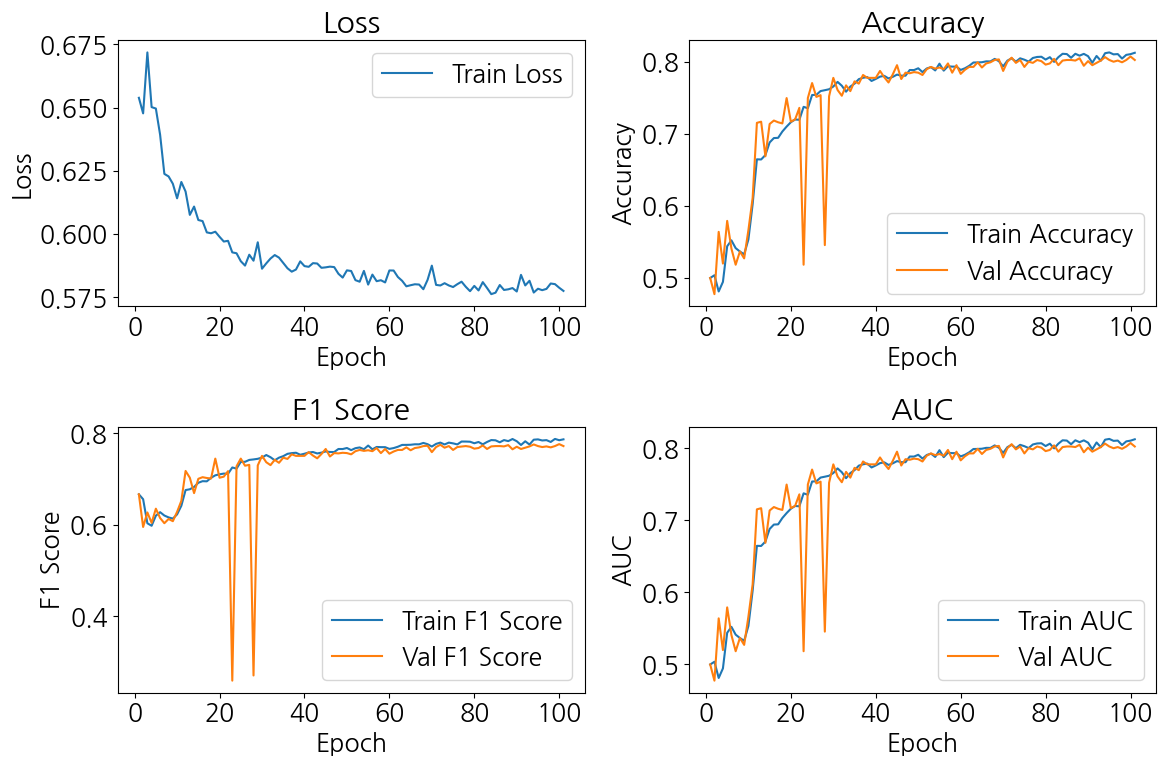

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Val Accuracy')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(range(1, len(train_f1_scores) + 1), train_f1_scores, label='Train F1 Score')
plt.plot(range(1, len(val_f1_scores) + 1), val_f1_scores, label='Val F1 Score')
plt.title("F1 Score")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(range(1, len(train_auc_scores) + 1), train_auc_scores, label='Train AUC')
plt.plot(range(1, len(val_auc_scores) + 1), val_auc_scores, label='Val AUC')
plt.title("AUC")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
print(val_data)

Data(edge_index=[2, 217066], Temperature=[1838], Price=[1838], Interest_Count=[1838], Chat_Count=[1838], View_Count=[1838], up=[1838], time=[1838], BERT_Embedding=[1838, 768], num_nodes=1838, x=[1838, 128], edge_label=[27132], edge_label_index=[2, 27132], pos_edge_label_index=[2, 625], neg_edge_label_index=[2, 625])


In [ ]:
model.eval()
y_pred, y_true = [], []

for data in val_loader:
    data = data.to(device)
    out = model(data)
    pred = out.view(-1).sigmoid() > 0.5
    y_pred.append(pred)
    y_true.append(data.y.view(-1))

y_true_concat = torch.cat(y_true).to(torch.float).cpu()
y_pred_concat = torch.cat(y_pred).to(torch.float).cpu()

wrong_indices = []
for i, (output, target) in enumerate(zip(y_pred_concat, y_true_concat)):
    if output != target:
        wrong_indices.append(i)

In [ ]:
val_data.pos_edge_label_index

tensor([[ 369, 1013, 1509,  ...,  277,  746,  232],
        [ 156, 1018,  794,  ..., 1441, 1406, 1519]])

In [ ]:
# False Negative와 False Positive가 완전히 잘 분류되지 않은 것 같음
# Link를 만들기 위한 점수가 저장되어 있는 dictionary 기반으로 코드 수정 필요

count = 0

for id in wrong_indices:
    if id < 625:
        edge = val_data.neg_edge_label_index[:, id]
        edge = edge.numpy()
        print('False Negative Edge:', df['Category'].iloc[edge[0]], df['Category'].iloc[edge[1]])
    else:
        edge = val_data.neg_edge_label_index[:, id - 625]
        edge = edge.numpy()
        print('False Positive Edge:', df['Category'].iloc[edge[0]], df['Category'].iloc[edge[1]])

        if df['Category'].iloc[edge[0]] == df['Category'].iloc[edge[1]]:
            count += 1

print()
print(count)

False Negative Edge: 남성패션/잡화 유아동
False Negative Edge: 유아동 여성의류
False Negative Edge: 유아동 유아동
False Negative Edge: 유아동 뷰티/미용
False Negative Edge: 디지털기기 남성패션/잡화
False Negative Edge: 뷰티/미용 유아동
False Negative Edge: 여성의류 티켓/교환권
False Negative Edge: 여성잡화 스포츠/레저
False Negative Edge: 기타 중고물품 디지털기기
False Negative Edge: 가구/인테리어 여성잡화
False Negative Edge: 티켓/교환권 기타 중고물품
False Negative Edge: 취미/게임/음반 생활가전
False Negative Edge: 스포츠/레저 생활/주방
False Negative Edge: 유아동 유아동
False Negative Edge: 유아동 도서
False Negative Edge: 남성패션/잡화 여성의류
False Negative Edge: 남성패션/잡화 생활가전
False Negative Edge: 유아동 여성잡화
False Negative Edge: 생활가전 반려동물용품
False Negative Edge: 디지털기기 여성의류
False Negative Edge: 여성의류 티켓/교환권
False Negative Edge: 여성의류 유아동
False Negative Edge: 유아동 여성잡화
False Negative Edge: 생활/주방 티켓/교환권
False Negative Edge: 남성패션/잡화 가구/인테리어
False Negative Edge: 도서 디지털기기
False Negative Edge: 유아동 여성의류
False Negative Edge: 뷰티/미용 티켓/교환권
False Negative Edge: 남성패션/잡화 스포츠/레저
False Negative Edge: 남성패션/잡화 생활가전
False Negative Edge: 티켓